### DESAFIO 2 - Grupo:

- Marcelo Colonno

In [130]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import random

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Importando os Datasets

In [131]:
n = 11449223 # Número de linhas do arquivo CSV
s = int(n * 0.01) # Tamanho da amostra a ser analisada (1%)

In [132]:
df_alunos = pd.read_csv('data/DM_ALUNO.csv', 
                        skiprows=sorted(random.sample(range(1,n),n-s)),
                        delimiter='|',
                        encoding='latin1', 
                        engine='c',
                        low_memory=True)
df_alunos.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_CURSO,NO_CURSO,CO_CURSO_POLO,CO_TURNO_ALUNO,...,IN_MOBILIDADE_ACADEMICA,CO_MOBILIDADE_ACADEMICA,CO_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,ANO_INGRESSO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,2014
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,1.0,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,2015
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,2013
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,1.0,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,2014
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,2015


In [133]:
df_docente = pd.read_csv(r'./data/DM_DOCENTE.csv',delimiter='|',encoding='latin1')
df_docente.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,IN_CAPITAL_IES,CO_DOCENTE_IES,CO_DOCENTE,CO_SITUACAO_DOCENTE,...,IN_ATU_GRAD_PRESENCIAL,IN_ATU_POS_EAD,IN_ATU_POS_PRESENCIAL,IN_ATU_SEQUENCIAL,IN_ATU_PESQUISA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,IN_EXERCICIO_DT_REF,IN_VISITANTE,IN_VISITANTE_IFES_VINCULO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559840,669,1,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559841,670,1,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559839,719,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559842,894,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559837,1446,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN


In [134]:
df_curso = pd.read_csv(r'./data/DM_CURSO.csv',delimiter='|',encoding='latin1')
df_curso.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_LOCAL_OFERTA_CURSO,CO_MUNICIPIO_CURSO,NO_MUNICIPIO_CURSO,CO_UF_CURSO,...,QT_VAGAS_PROG_ESP_INTEGRAL,QT_VAGAS_PROG_ESP_MATUTINO,QT_VAGAS_PROG_ESP_VESPERTINO,QT_VAGAS_PROG_ESP_NOTURNO,QT_VAGAS_PROG_ESP_EAD,QT_MATRICULA_CURSO,QT_CONCLUINTE_CURSO,QT_INGRESSO_CURSO,QT_INGRESSO_VAGAS_NOVAS,QT_VAGAS_TOTAIS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,NaN,0.0,NaN,0.0,NaN,432.0,66.0,91.0,89.0,90
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,NaN,0.0,NaN,0.0,NaN,391.0,63.0,103.0,103.0,106
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,0.0,NaN,NaN,NaN,NaN,266.0,36.0,56.0,55.0,55
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,NaN,0.0,0.0,NaN,NaN,305.0,36.0,98.0,98.0,100
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,NaN,0.0,NaN,NaN,NaN,268.0,37.0,82.0,82.0,83


In [135]:
df_IES = pd.read_csv(r'./data/DM_IES.csv',delimiter='|',encoding='latin1')
df_IES.head()

,CO_IES,NO_IES,SGL_IES,CO_MANTENEDORA,NO_MANTENEDORA,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_MUNICIPIO_IES,...,VL_RECEITA_PROPRIA,VL_TRANSFERENCIA,VL_OUTRA_RECEITA,VL_DES_PESSOAL_REM_DOCENTE,VL_DES_PESSOAL_REM_TECNICO,VL_DES_PESSOAL_ENCARGO,VL_DES_CUSTEIO,VL_DES_INVESTIMENTO,VL_DES_PESQUISA,VL_DES_OUTRAS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,FUNDACAO UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,5103403,...,7847404.77,8.463274e+08,0.000000e+00,2.409985e+08,1.047201e+08,1.016396e+08,1.301580e+08,17926971.06,14034108.54,2.446976e+08
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,2,FUNDACAO UNIVERSIDADE DE BRASILIA,1,Pública Federal,1,Universidade,5300108,...,42952090.56,1.125740e+08,1.270250e+08,9.406867e+08,0.000000e+00,9.406867e+08,3.031958e+08,29754378.97,12466559.85,3.734387e+08
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,3,FUNDACAO UNIVERSIDADE FEDERAL DE SERGIPE,1,Pública Federal,1,Universidade,2806701,...,4744562.76,7.149826e+08,2.693960e+08,2.817225e+08,1.516967e+08,1.128631e+08,1.558269e+08,53033112.85,25766649.67,0.000000e+00
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,4,FUNDACAO UNIVERSIDADE DO AMAZONAS,1,Pública Federal,1,Universidade,1302603,...,7331203.25,6.319321e+08,7.760058e+05,3.123510e+08,0.000000e+00,9.795765e+07,1.474634e+08,31936025.81,1055524.04,1.368965e+08
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,6,UNIVERSIDADE FEDERAL DE OURO PRETO,1,Pública Federal,1,Universidade,3146107,...,3746358.40,4.009708e+08,3.957849e+06,1.543418e+08,7.137004e+07,3.582467e+07,4.110826e+07,1676309.58,1142377.41,1.032126e+08


In [136]:
df_local_oferta = pd.read_csv(r'./data/DM_LOCAL_OFERTA.csv',delimiter='|',encoding='latin1')
df_local_oferta.head()

,CO_LOCAL_OFERTA,NO_LOCAL_OFERTA,CO_IES,CO_UF_LOCAL_OFERTA,SGL_UF_LOCAL_OFERTA,CO_MUNICIPIO_LOCAL_OFERTA,NO_MUNICIPIO_LOCAL_OFERTA,IN_SEDE,CO_CURSO_POLO,CO_CURSO,IN_LOCAL_OFERTA_NEAD,IN_LOCAL_OFERTA_UAB,IN_LOCAL_OFERTA_REITORIA,IN_LOCAL_OFERTA_POLO,IN_LOCAL_OFERTA_UNID_ACADEMICA,DT_INICIO_FUNCIONAMENTO
0,105340,Campus Universitário de Cuiabá,1,51,MT,5103403,Cuiabá,1.0,NaN,1,1,1,1,1,1,05/09/1952
1,105340,Campus Universitário de Cuiabá,1,51,MT,5103403,Cuiabá,1.0,NaN,2,1,1,1,1,1,11/10/1968
2,105340,Campus Universitário de Cuiabá,1,51,MT,5103403,Cuiabá,1.0,NaN,3,1,1,1,1,1,11/10/1968
3,105340,Campus Universitário de Cuiabá,1,51,MT,5103403,Cuiabá,1.0,NaN,6,1,1,1,1,1,15/09/1970
4,105340,Campus Universitário de Cuiabá,1,51,MT,5103403,Cuiabá,1.0,NaN,7,1,1,1,1,1,09/03/1970


## 1. Tabelas com número de universidades públicas e privadas por Estado e número de alunos por universidade.

## 1.1 Tabela com número de universidades públicas e privadas por Estado:

<font color='blue' size=4>
Iremos agrupar as universidades/faculdades por categoria administrativa mantendo as suas quantidades totais por estado e depois plotar um quadro de calor com os dados.

In [137]:
df_estados = df_IES[['DS_CATEGORIA_ADMINISTRATIVA','SGL_UF_IES']]
df_estados.head()

,DS_CATEGORIA_ADMINISTRATIVA,SGL_UF_IES
0,Pública Federal,MT
1,Pública Federal,DF
2,Pública Federal,SE
3,Pública Federal,AM
4,Pública Federal,MG


In [138]:
dummies_estados = pd.get_dummies(df_IES['SGL_UF_IES'])
df_IES_estados = pd.concat([df_estados,dummies_estados], axis=1)
df_IES_estados.head()

,DS_CATEGORIA_ADMINISTRATIVA,SGL_UF_IES,AC,AL,AM,AP,BA,CE,DF,ES,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,Pública Federal,MT,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pública Federal,DF,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Pública Federal,SE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Pública Federal,AM,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pública Federal,MG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df_IES_estados_univ = df_IES_estados.groupby('DS_CATEGORIA_ADMINISTRATIVA').sum()
df_IES_estados_univ.T

DS_CATEGORIA_ADMINISTRATIVA,Especial,Privada com fins lucrativos,Privada sem fins lucrativos,Pública Estadual,Pública Federal,Pública Municipal
AC,0.0,5.0,4.0,0.0,2.0,0.0
AL,0.0,12.0,12.0,2.0,2.0,0.0
AM,0.0,8.0,8.0,1.0,2.0,0.0
AP,0.0,8.0,5.0,1.0,2.0,0.0
BA,0.0,78.0,33.0,4.0,6.0,0.0
CE,0.0,40.0,18.0,3.0,4.0,0.0
DF,0.0,31.0,24.0,2.0,2.0,0.0
ES,0.0,31.0,45.0,1.0,2.0,2.0
GO,3.0,56.0,24.0,1.0,3.0,1.0
MA,0.0,28.0,7.0,1.0,2.0,0.0


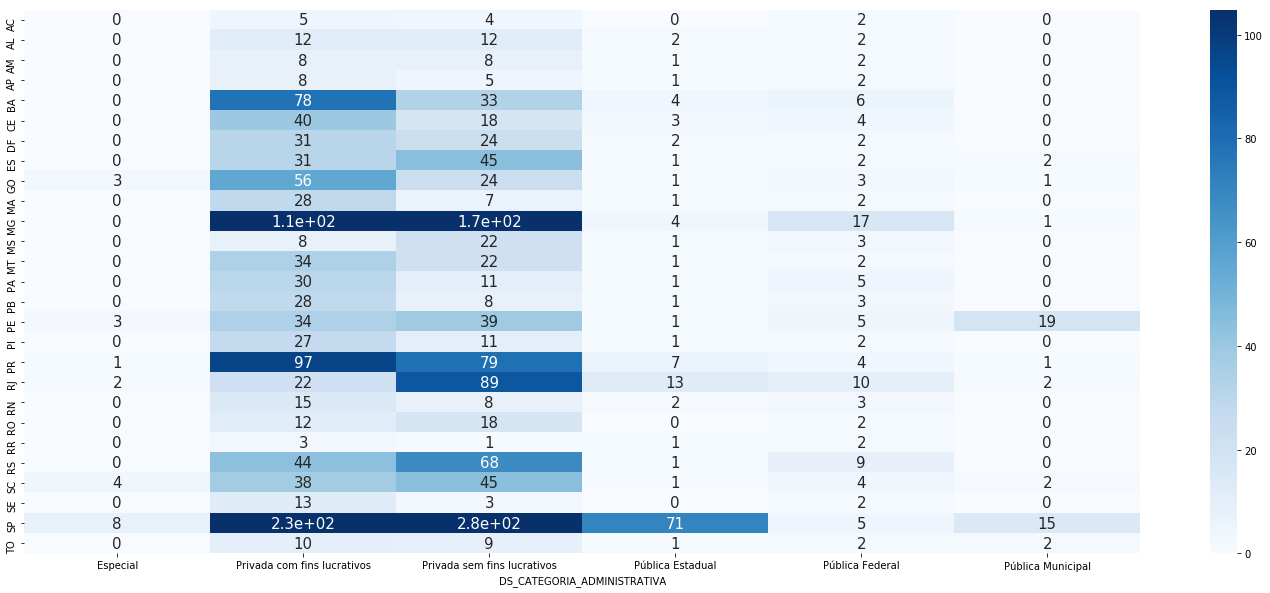

In [140]:
plt.figure(figsize=(25,10))
sns.heatmap(df_IES_estados_univ.T,robust=True, annot=True, annot_kws={"size": 15}, cmap="Blues");

### 1.2 Número de alunos por universidade (categoria administrativa):

<font color='blue' size=4>
Novamente iremos agrupar as universidades/faculdades por categoria administrativa mantendo as quantidades totais de alunos por situação (cursando, desvinculado, formado, matrícula trancada, transferido) e, por fim, plotar um quadro de calor com os dados.

In [141]:
df_alunos_situacao = df_alunos[['DS_CATEGORIA_ADMINISTRATIVA','DS_ALUNO_SITUACAO']]

In [142]:
dummies_situacao = pd.get_dummies(df_alunos_situacao['DS_ALUNO_SITUACAO'])
df_alunos_situacao = pd.concat([df_alunos_situacao,dummies_situacao],axis=1)
df_alunos_situacao.head()

,DS_CATEGORIA_ADMINISTRATIVA,DS_ALUNO_SITUACAO,Cursando,Desvinculado do curso,Falecido,Formado,Matrícula trancada,Transferido para outro curso da mesma IES
0,Pública Federal,Cursando,1,0,0,0,0,0
1,Pública Federal,Cursando,1,0,0,0,0,0
2,Pública Federal,Cursando,1,0,0,0,0,0
3,Pública Federal,Cursando,1,0,0,0,0,0
4,Pública Federal,Cursando,1,0,0,0,0,0


In [143]:
df_alunos_situacao.groupby('DS_CATEGORIA_ADMINISTRATIVA').sum().T

DS_CATEGORIA_ADMINISTRATIVA,Especial,Privada com fins lucrativos,Privada sem fins lucrativos,Pública Estadual,Pública Federal,Pública Municipal
Cursando,619.0,28682.0,22421.0,5452.0,11238.0,392.0
Desvinculado do curso,128.0,11463.0,6047.0,847.0,1827.0,83.0
Falecido,0.0,10.0,6.0,0.0,4.0,0.0
Formado,117.0,4900.0,4305.0,789.0,1516.0,100.0
Matrícula trancada,98.0,6174.0,4345.0,407.0,1443.0,36.0
Transferido para outro curso da mesma IES,7.0,417.0,425.0,40.0,152.0,1.0


In [1]:
plt.figure(figsize=(25,10))
sns.heatmap(df_alunos_situacao.groupby('DS_CATEGORIA_ADMINISTRATIVA').sum().T,
            robust=True,annot=True,annot_kws={"size":20}, cmap="Blues");

NameError: name 'plt' is not defined

## 2. É verdade que existe menos mulheres nos cursos de Exatas ? Explique com dados.

<font color='blue' size=4>
Iremos agrupar os dados separados por sexo dos alunos mantendo a área geral dos cursos. Depois somaremos os cursos de exatas (ciências, matemática e computação,  engenharia, produção e construção) e dividiremos pelo total de todas as áreas para extrair a porcentagem de mulheres em exatas. Apresentaremos depois um mapa de calor com as quantidades de alunos em cada área por sexo.

In [145]:
df_sexo_area = df_alunos[['DS_SEXO_ALUNO','NO_OCDE_AREA_GERAL']]
df_sexo_area.head()

,DS_SEXO_ALUNO,NO_OCDE_AREA_GERAL
0,Masculino,"Ciências sociais, negócios e direito"
1,Masculino,"Ciências sociais, negócios e direito"
2,Masculino,"Ciências sociais, negócios e direito"
3,Feminino,"Ciências sociais, negócios e direito"
4,Feminino,"Ciências sociais, negócios e direito"


In [146]:
dummies_sexo_area = pd.get_dummies(df_sexo_area['NO_OCDE_AREA_GERAL'])
df_dummies_sexo_area = pd.concat([df_sexo_area, dummies_sexo_area],axis=1)
df_dummies_sexo_area.head()

,DS_SEXO_ALUNO,NO_OCDE_AREA_GERAL,Agricultura e veterinária,"Ciências sociais, negócios e direito","Ciências, matemática e computação",Educação,"Engenharia, produção e construção",Humanidades e artes,Saúde e bem estar social,Serviços
0,Masculino,"Ciências sociais, negócios e direito",0,1,0,0,0,0,0,0
1,Masculino,"Ciências sociais, negócios e direito",0,1,0,0,0,0,0,0
2,Masculino,"Ciências sociais, negócios e direito",0,1,0,0,0,0,0,0
3,Feminino,"Ciências sociais, negócios e direito",0,1,0,0,0,0,0,0
4,Feminino,"Ciências sociais, negócios e direito",0,1,0,0,0,0,0,0


In [147]:
df_dummies_sexo_area_totais = df_dummies_sexo_area.groupby('DS_SEXO_ALUNO').sum()
df_dummies_sexo_area_totais

,Agricultura e veterinária,"Ciências sociais, negócios e direito","Ciências, matemática e computação",Educação,"Engenharia, produção e construção",Humanidades e artes,Saúde e bem estar social,Serviços
DS_SEXO_ALUNO,,,,,,,,
Feminino,1447.0,24877.0,2056.0,14624.0,5458.0,1353.0,12058.0,1610.0
Masculino,1438.0,19389.0,4909.0,6461.0,11879.0,1165.0,4149.0,1079.0


In [148]:
# Mulheres em Ciências e Engenharia
mulheres_ciencias_total = df_dummies_sexo_area_totais['Ciências, matemática e computação']['Feminino']
mulheres_engenharia_total = df_dummies_sexo_area_totais['Engenharia, produção e construção']['Feminino']

# Total de estudantes em Ciências e Engenharia
ciencias_total = df_dummies_sexo_area_totais['Ciências, matemática e computação'].sum()
engenharia_total = df_dummies_sexo_area_totais['Engenharia, produção e construção'].sum()

# Total de mulheres nos cursos de Exatas
mulheres_exatas = mulheres_ciencias_total + mulheres_engenharia_total

# Total de estudantes nos cursos de Exatas
total_exatas = ciencias_total + engenharia_total

# Taxa de mulheres nos cursos de Exatas
taxa_mulheres_exatas = mulheres_exatas / total_exatas

In [149]:
print("..........................................................................\n")
print("Total de MULHERES nos cursos de Ciências, Matemática e Computação..: ", int(mulheres_ciencias_total))
print("Total de MULHERES nos cursos de Engenharia, Produção e Construção..: ", int(mulheres_engenharia_total))
print("Total de MULHERES nos cursos de Exatas.............................: ", int(mulheres_exatas))
print("")
print("Total de ESTUDANTES nos cursos de Ciências, Matemática e Computação: ", int(ciencias_total))
print("Total de ESTUDANTES nos cursos de Engenharia, Produção e Construção: ", int(engenharia_total))
print("Total de ESTUDANTES nos cursos de Exatas...........................: ", int(total_exatas))
print("\n..........................................................................")
print("\nSim, existem menos mulheres nos cursos de Exatas. A proporção é de: {0:.2f}%.".
      format(taxa_mulheres_exatas*100))

..........................................................................

Total de MULHERES nos cursos de Ciências, Matemática e Computação..:  2056
Total de MULHERES nos cursos de Engenharia, Produção e Construção..:  5458
Total de MULHERES nos cursos de Exatas.............................:  7514

Total de ESTUDANTES nos cursos de Ciências, Matemática e Computação:  6965
Total de ESTUDANTES nos cursos de Engenharia, Produção e Construção:  17337
Total de ESTUDANTES nos cursos de Exatas...........................:  24302

..........................................................................

Sim, existem menos mulheres nos cursos de Exatas. A proporção é de: 30.92%.


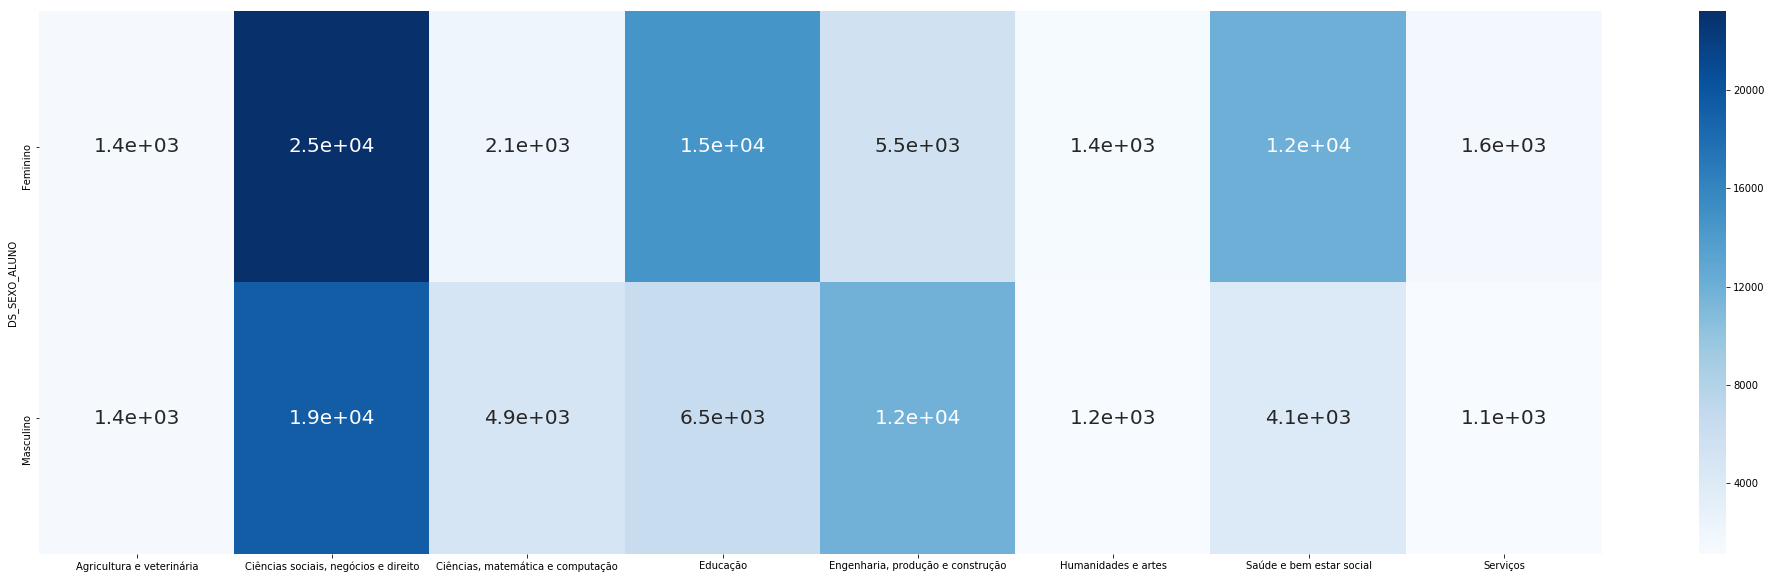

In [150]:
plt.figure(figsize=(35,10))
sns.heatmap(df_dummies_sexo_area_totais, robust=True, annot=True, annot_kws={"size":20}, cmap="Blues");

## 3. Quantos cursos novos abrem por ano ?

<font color='blue' size=4>
Iremos agrupar os dados do DataFrame dos cursos pelo ano da sua data de início de funcionamento (nova coluna) e criaremos uma outra coluna para contagem da quantidade total de cursos abertos em cada ano. Feito isso, colocaremos os dados em um boxplot para visualização da sua evolução.

In [151]:
df_curso['ANO'] = df_curso['DT_INICIO_FUNCIONAMENTO'].str[-4:]
df_curso['COUNT'] = 1
df_curso.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_LOCAL_OFERTA_CURSO,CO_MUNICIPIO_CURSO,NO_MUNICIPIO_CURSO,CO_UF_CURSO,...,QT_VAGAS_PROG_ESP_VESPERTINO,QT_VAGAS_PROG_ESP_NOTURNO,QT_VAGAS_PROG_ESP_EAD,QT_MATRICULA_CURSO,QT_CONCLUINTE_CURSO,QT_INGRESSO_CURSO,QT_INGRESSO_VAGAS_NOVAS,QT_VAGAS_TOTAIS,ANO,COUNT
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,NaN,0.0,NaN,432.0,66.0,91.0,89.0,90,1952,1
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,NaN,0.0,NaN,391.0,63.0,103.0,103.0,106,1968,1
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,NaN,NaN,NaN,266.0,36.0,56.0,55.0,55,1968,1
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,0.0,NaN,NaN,305.0,36.0,98.0,98.0,100,1970,1
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,NaN,NaN,NaN,268.0,37.0,82.0,82.0,83,1970,1


In [152]:
df_ano = df_curso.groupby('ANO').agg({'COUNT':'sum'})

In [153]:
df_ano = df_ano.reset_index()

In [154]:
converte_inteiro = lambda s: int(s)
df_ano['ANO'] = df_ano['ANO'].apply(converte_inteiro)
df_ano.head()

,ANO,COUNT
0,1808,2
1,1811,1
2,1816,3
3,1820,1
4,1828,2


In [155]:
# Considerando apenas os anos a partir de 1990, relevante para a criação de cursos

df_ano_maior_1990 = df_ano[df_ano['ANO'] >= 1990]
df_ano_maior_1990.head(10)

,ANO,COUNT
106,1990,230
107,1991,94
108,1992,188
109,1993,183
110,1994,243
111,1995,247
112,1996,235
113,1997,336
114,1998,565
115,1999,772


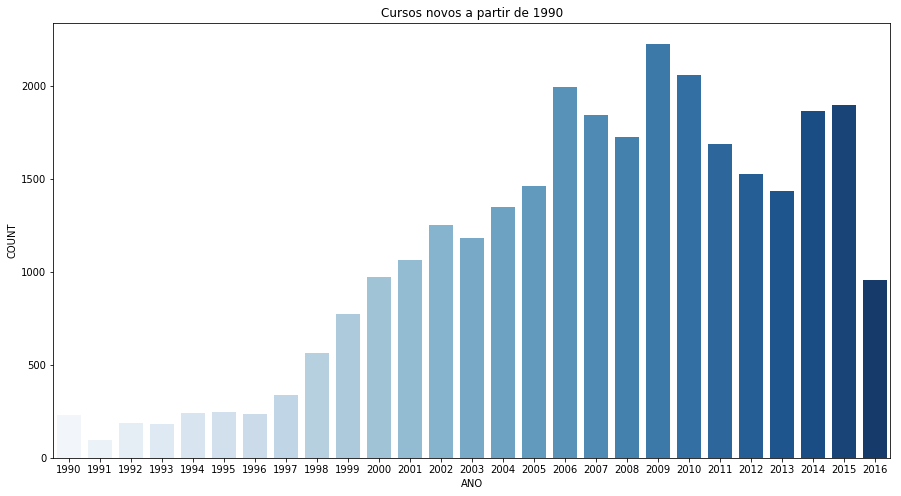

In [156]:
plt.figure(figsize=(15,8))
plt.title("Cursos novos a partir de 1990")
sns.barplot(x="ANO", y="COUNT", data=df_ano_maior_1990, palette='Blues');

## 4. Se usarmos a taxa de concluientes de um curso como variável de dificuldade dos cursos, eles tem ficado mais fáceis ou mais duros ? Ao longo do tempo? Quais as dificuldades para uma afirmação dessas?

<font color='blue' size=4>
Iremos pegar o DataFrame dos alunos e filtrar por ano de ingresso totalizando a quantidade de alunos matriculados e concluintes. Feito isso, criaremos uma coluna para a nossa taxa de conclusão que vale o número de alunos concluintes divididos pelos matriculados e verificamos a sua distribuição. Obs.: Foram considerados apenas os cursos criados à partir de 1990.

In [157]:
# Considerando apenas os alunos que entraram nos cursos à partir de 1990.
df_alunos_maior_1990 = df_alunos[df_alunos['ANO_INGRESSO'].apply(converte_inteiro) >= 1990]

In [158]:
df_alunos_situacao = df_alunos_maior_1990[['NO_CURSO', 
                                           'DS_ALUNO_SITUACAO', 
                                           'ANO_INGRESSO']]
df_alunos_situacao_dummy = pd.get_dummies(df_alunos_situacao['DS_ALUNO_SITUACAO'])
df_alunos_situacao = pd.concat([df_alunos_situacao, df_alunos_situacao_dummy], axis=1)

In [159]:
df_qtd_alunos_situacao = df_alunos_situacao.groupby(['NO_CURSO','ANO_INGRESSO']).sum()
df_qtd_alunos_situacao = df_qtd_alunos_situacao.reset_index()
df_qtd_alunos_situacao.head()

,NO_CURSO,ANO_INGRESSO,Cursando,Desvinculado do curso,Falecido,Formado,Matrícula trancada,Transferido para outro curso da mesma IES
0,ABI - ARTES CÊNICAS,2011,0.0,0.0,0.0,0.0,1.0,0.0
1,ABI - ARTES CÊNICAS,2015,1.0,0.0,0.0,0.0,0.0,1.0
2,ABI - ARTES CÊNICAS,2016,1.0,1.0,0.0,0.0,0.0,0.0
3,ABI - ARTES VISUAIS,2014,2.0,0.0,0.0,0.0,0.0,0.0
4,ABI - ARTES VISUAIS,2015,2.0,0.0,0.0,0.0,0.0,0.0


In [160]:
# Calculando a taxa de conclusão como sendo o total de alunos formados por curso em um determinado ano dividido
# somatório de todas as situações desse mesmo ano e multiplicado por 100 (expressar valores em %)

df_qtd_alunos_situacao['TAXA_CONCLUSAO'] = (df_qtd_alunos_situacao['Formado']/(df_qtd_alunos_situacao['Cursando'] +
                                            df_qtd_alunos_situacao['Desvinculado do curso'] +
                                            df_qtd_alunos_situacao['Falecido'] +
                                            df_qtd_alunos_situacao['Formado'] +
                                            df_qtd_alunos_situacao['Matrícula trancada'] +
                                            df_qtd_alunos_situacao['Transferido para outro curso da mesma IES']))*100

In [161]:
# O mesmo procedimento para a taxa de abandono
df_qtd_alunos_situacao['TAXA_ABANDONO'] = ((df_qtd_alunos_situacao['Matrícula trancada'] + 
                                           df_qtd_alunos_situacao['Desvinculado do curso']) / 
                                          (df_qtd_alunos_situacao['Cursando'] +
                                           df_qtd_alunos_situacao['Desvinculado do curso'] +
                                           df_qtd_alunos_situacao['Falecido'] +
                                           df_qtd_alunos_situacao['Formado'] +
                                           df_qtd_alunos_situacao['Matrícula trancada'] +
                                           df_qtd_alunos_situacao['Transferido para outro curso da mesma IES']))*100

In [162]:
df_qtd_alunos_situacao.head()

,NO_CURSO,ANO_INGRESSO,Cursando,Desvinculado do curso,Falecido,Formado,Matrícula trancada,Transferido para outro curso da mesma IES,TAXA_CONCLUSAO,TAXA_ABANDONO
0,ABI - ARTES CÊNICAS,2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100.0
1,ABI - ARTES CÊNICAS,2015,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ABI - ARTES CÊNICAS,2016,1.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0
3,ABI - ARTES VISUAIS,2014,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABI - ARTES VISUAIS,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
# Removendo as taxas iguais a ZERO (0%) e iguais a UM (100%) da Taxa de Conclusão

df_qtd_alunos_situacao = df_qtd_alunos_situacao[df_qtd_alunos_situacao['TAXA_CONCLUSAO'] > 0]
df_qtd_alunos_situacao = df_qtd_alunos_situacao[df_qtd_alunos_situacao['TAXA_CONCLUSAO'] < 100]

In [164]:
# Para uma simples visualização, ordenando por curso e ano

df_qtd_alunos_situacao.sort_values(by=['NO_CURSO','ANO_INGRESSO'], ascending=True).head()

,NO_CURSO,ANO_INGRESSO,Cursando,Desvinculado do curso,Falecido,Formado,Matrícula trancada,Transferido para outro curso da mesma IES,TAXA_CONCLUSAO,TAXA_ABANDONO
152,ADMINISTRAÇÃO,2002,1.0,2.0,0.0,1.0,0.0,0.0,25.000000,50.000000
155,ADMINISTRAÇÃO,2005,5.0,2.0,0.0,3.0,2.0,0.0,25.000000,33.333333
156,ADMINISTRAÇÃO,2006,9.0,8.0,0.0,6.0,4.0,0.0,22.222222,44.444444
157,ADMINISTRAÇÃO,2007,9.0,14.0,0.0,9.0,9.0,1.0,21.428571,54.761905
158,ADMINISTRAÇÃO,2008,25.0,74.0,0.0,20.0,27.0,1.0,13.605442,68.707483


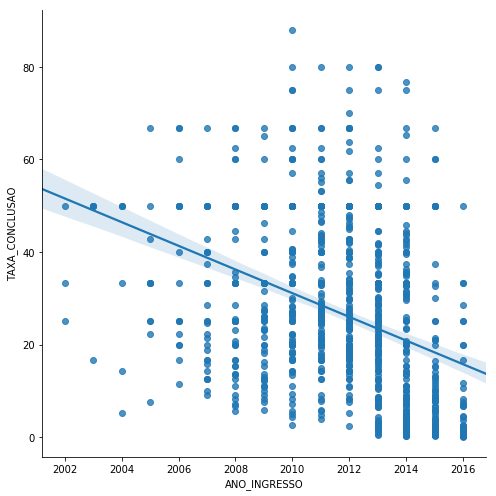

In [165]:
sns.lmplot(x="ANO_INGRESSO",y="TAXA_CONCLUSAO",data=df_qtd_alunos_situacao,size = 7);

In [166]:
df_qtd_alunos_situacao.corr()

,ANO_INGRESSO,Cursando,Desvinculado do curso,Falecido,Formado,Matrícula trancada,Transferido para outro curso da mesma IES,TAXA_CONCLUSAO,TAXA_ABANDONO
ANO_INGRESSO,1.000000,0.290770,0.272650,0.081939,0.053303,0.270092,0.250487,-0.374815,-0.208574
Cursando,0.290770,1.000000,0.926256,0.186808,0.260319,0.880162,0.705398,-0.318570,-0.071629
Desvinculado do curso,0.272650,0.926256,1.000000,0.148045,0.403634,0.922005,0.765997,-0.305175,0.030581
Falecido,0.081939,0.186808,0.148045,1.000000,0.085587,0.197056,0.153412,-0.074479,-0.011222
Formado,0.053303,0.260319,0.403634,0.085587,1.000000,0.385050,0.220879,0.076262,-0.032594
Matrícula trancada,0.270092,0.880162,0.922005,0.197056,0.385050,1.000000,0.875683,-0.307771,0.013640
Transferido para outro curso da mesma IES,0.250487,0.705398,0.765997,0.153412,0.220879,0.875683,1.000000,-0.286976,-0.010655
TAXA_CONCLUSAO,-0.374815,-0.318570,-0.305175,-0.074479,0.076262,-0.307771,-0.286976,1.000000,-0.297258
TAXA_ABANDONO,-0.208574,-0.071629,0.030581,-0.011222,-0.032594,0.013640,-0.010655,-0.297258,1.000000


<font color='blue' size=4>
Observamos que conforme o ano de ingresso aumenta, a nossa taxa de conclusão diminui, em uma correlação negativa, porém não podemos afirmar que esta variação está relacionada aos cursos se tornarem mais duros

In [167]:
df_qtd_alunos_situacao.groupby(['ANO_INGRESSO']).agg({'TAXA_CONCLUSAO':'mean'})

,TAXA_CONCLUSAO
ANO_INGRESSO,
2002,36.111111
2003,43.333333
2004,33.813701
2005,33.888334
2006,37.888007
2007,29.759899
2008,30.935962
2009,28.651065
2010,34.130113


## 5. Rode uma regressão múltipla que explique o abandono dos cursos. Será que professores mais/menos preparados influencia nessas taxas?

In [168]:
# Ainda considerando os alunos que ingressaram nas universidades a partir de 1990

dummies_situacao = pd.get_dummies(df_alunos_maior_1990['DS_ALUNO_SITUACAO'])
df_alunos_abandono = pd.concat([df_alunos_maior_1990, dummies_situacao], axis=1)

# Criando uma nova coluna com a indicação que o aluno abandonou ou não o curso
df_alunos_abandono['Abandono'] = df_alunos_abandono['Desvinculado do curso'] + df_alunos_abandono['Matrícula trancada']
df_alunos_abandono = df_alunos_abandono.drop(['Desvinculado do curso', 'Matrícula trancada'], axis=1)
df_alunos_abandono.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_CURSO,NO_CURSO,CO_CURSO_POLO,CO_TURNO_ALUNO,...,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,ANO_INGRESSO,Cursando,Falecido,Formado,Transferido para outro curso da mesma IES,Abandono
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,1,0,0,0,2014,1,0,0,0,0
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,1.0,...,1,0,0,0,2015,1,0,0,0,0
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,1,0,0,0,2013,1,0,0,0,0
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,1.0,...,1,0,0,0,2014,1,0,0,0,0
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,1,0,0,0,2015,1,0,0,0,0


In [169]:
df_alunos_abandono['IN_RESERVA_VAGAS'] = df_alunos_abandono['IN_RESERVA_VAGAS'].fillna(0)
df_alunos_abandono['IN_RESERVA_ETNICO'] = df_alunos_abandono['IN_RESERVA_ETNICO'].fillna(0)
df_alunos_abandono['IN_RESERVA_DEFICIENCIA'] = df_alunos_abandono['IN_RESERVA_DEFICIENCIA'].fillna(0)
df_alunos_abandono['IN_RESERVA_ENSINO_PUBLICO'] = df_alunos_abandono['IN_RESERVA_ENSINO_PUBLICO'].fillna(0)
df_alunos_abandono['IN_RESERVA_RENDA_FAMILIAR'] = df_alunos_abandono['IN_RESERVA_RENDA_FAMILIAR'].fillna(0)
df_alunos_abandono['IN_RESERVA_OUTRA'] = df_alunos_abandono['IN_RESERVA_OUTRA'].fillna(0)

In [170]:
df_alunos_abandono['IN_ING_VESTIBULAR'] = df_alunos_abandono['IN_ING_VESTIBULAR'].fillna(0)
df_alunos_abandono['IN_ING_ENEM'] = df_alunos_abandono['IN_ING_ENEM'].fillna(0)
df_alunos_abandono['IN_ING_AVALIACAO_SERIADA'] = df_alunos_abandono['IN_ING_AVALIACAO_SERIADA'].fillna(0)
df_alunos_abandono['IN_ING_SELECAO_SIMPLIFICADA'] = df_alunos_abandono['IN_ING_SELECAO_SIMPLIFICADA'].fillna(0)
df_alunos_abandono['IN_ING_SELECAO_VAGA_REMANESC'] = df_alunos_abandono['IN_ING_SELECAO_VAGA_REMANESC'].fillna(0)
df_alunos_abandono['IN_ING_SELECAO_VAGA_PROG_ESPEC'] = df_alunos_abandono['IN_ING_SELECAO_VAGA_PROG_ESPEC'].fillna(0)
df_alunos_abandono['IN_ING_TRANSF_EXOFFICIO'] = df_alunos_abandono['IN_ING_TRANSF_EXOFFICIO'].fillna(0)
df_alunos_abandono['IN_ING_DECISAO_JUDICIAL'] = df_alunos_abandono['IN_ING_DECISAO_JUDICIAL'].fillna(0)
df_alunos_abandono['IN_ING_CONVENIO_PECG'] = df_alunos_abandono['IN_ING_CONVENIO_PECG'].fillna(0)

In [171]:
df_alunos_abandono['IN_FINANC_ESTUDANTIL'] = df_alunos_abandono['IN_FINANC_ESTUDANTIL'].fillna(0)
df_alunos_abandono['IN_FIN_REEMB_FIES'] = df_alunos_abandono['IN_FIN_REEMB_FIES'].fillna(0)
df_alunos_abandono['IN_RESERVA_VAGAS'] = df_alunos_abandono['IN_RESERVA_VAGAS'].fillna(0)
df_alunos_abandono['IN_RESERVA_RENDA_FAMILIAR'] = df_alunos_abandono['IN_RESERVA_RENDA_FAMILIAR'].fillna(0)
df_alunos_abandono['IN_ING_VESTIBULAR'] = df_alunos_abandono['IN_ING_VESTIBULAR'].fillna(0)
df_alunos_abandono['IN_ING_ENEM'] = df_alunos_abandono['IN_ING_ENEM'].fillna(0)
df_alunos_abandono['IN_ING_SELECAO_VAGA_REMANESC'] = df_alunos_abandono['IN_ING_SELECAO_VAGA_REMANESC'].fillna(0)

In [172]:
# Rodando uma regressão múltipla em cima do dataset de alunos

function = ''' Abandono ~
 +C(IN_APOIO_SOCIAL)
 +C(IN_APOIO_ALIMENTACAO)
 +C(IN_APOIO_BOLSA_PERMANENCIA)
 +C(IN_APOIO_BOLSA_TRABALHO)
 +C(IN_APOIO_MATERIAL_DIDATICO)
 +C(IN_APOIO_MORADIA)
 +C(IN_APOIO_TRANSPORTE)
 
 +C(IN_BOLSA_ESTAGIO)
 +C(IN_BOLSA_EXTENSAO)
 +C(IN_BOLSA_MONITORIA)
 +C(IN_BOLSA_PESQUISA)
 
 +C(IN_FINANC_ESTUDANTIL)
 +C(IN_FIN_REEMB_FIES)
 
 +C(IN_RESERVA_VAGAS)
 +C(IN_RESERVA_RENDA_FAMILIAR)
 
 +C(IN_ING_VESTIBULAR)
 +C(IN_ING_ENEM)
 +C(IN_ING_SELECAO_VAGA_REMANESC)
 
 +C(CO_TIPO_ESCOLA_ENS_MEDIO)
 +C(CO_GRAU_ACADEMICO)
 
 +C(IN_SEXO_ALUNO)
 +C(CO_COR_RACA_ALUNO)
 +NU_IDADE_ALUNO
 
 +QT_CARGA_HORARIA_INTEG
 +(ANO_INGRESSO)
 
 '''
    
model = smf.ols(function, df_alunos_abandono).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Abandono   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3.823
Date:                Fri, 24 Jan 2020   Prob (F-statistic):            0.00585
Time:                        11:04:07   Log-Likelihood:                 10.165
No. Observations:                  34   AIC:                             17.67
Df Residuals:                      15   BIC:                             46.67
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


<font color='blue' size=4>
Variáveis como os auxílios recebidos pelos alunos, sexo, raça, idade e carga horária integral dos cursos conseguem explicar parcialmente os abandonos nas universidades.

<font color='blue' size=4>
Agora vamos buscar a correlação entre a taxa de abandono dos cursos e o grau de formação dos docentes.

In [173]:
df_docente_form = df_docente[['CO_IES', 
                              'NO_IES', 
                              'CO_CATEGORIA_ADMINISTRATIVA',
                              'DS_CATEGORIA_ADMINISTRATIVA', 
                              'CO_ORGANIZACAO_ACADEMICA',
                              'DS_ESCOLARIDADE_DOCENTE',
                              'CO_SITUACAO_DOCENTE'
                             ]]

# Usar apenas professores em exercício
em_exercicio = df_docente_form['CO_SITUACAO_DOCENTE'] == 1

df_docente_form = df_docente_form[em_exercicio]
dummies_docente = pd.get_dummies(df_docente_form['DS_ESCOLARIDADE_DOCENTE'])
df_docente_form = pd.concat([df_docente_form,dummies_docente],axis=1)
df_docente_form = df_docente_form.drop(['DS_ESCOLARIDADE_DOCENTE'], axis=1)
df_docente_form.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,CO_SITUACAO_DOCENTE,Doutorado,Especialização,Graduação,Mestrado,Sem Graduação
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,1,1,0,0,0,0
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,1,1,0,0,0,0
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,1,0,0,0,1,0
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,1,0,1,0,0,0
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,1,1,0,0,0,0


In [174]:
# Agregando as informações referentes à graduação dos professores
df_docente_graduacao = df_docente_form.groupby(['CO_IES', 
                                                'NO_IES', 
                                                'CO_CATEGORIA_ADMINISTRATIVA', 
                                                'DS_CATEGORIA_ADMINISTRATIVA', 
                                                'CO_ORGANIZACAO_ACADEMICA']).agg({'Doutorado':'sum',
                                                                                  'Especialização':'sum',
                                                                                  'Graduação':'sum',
                                                                                  'Mestrado':'sum',
                                                                                  'Sem Graduação':'sum'})
df_docente_graduacao = df_docente_graduacao.reset_index()
df_docente_graduacao.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,Doutorado,Especialização,Graduação,Mestrado,Sem Graduação
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,1284.0,138.0,176,642.0,0
1,2,UNIVERSIDADE DE BRASÍLIA,1,Pública Federal,1,2367.0,24.0,33,450.0,0
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,1,Pública Federal,1,1143.0,80.0,87,461.0,0
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,1,Pública Federal,1,783.0,200.0,165,513.0,0
4,5,UNIVERSIDADE FEDERAL DO PIAUÍ,1,Pública Federal,1,925.0,262.0,31,632.0,0


In [175]:
df_docente_graduacao.shape

(2407, 10)

In [176]:
# Reduzindo as colunas do dataframme de alunos
df_alunos_org_abandono = df_alunos_abandono[['CO_IES', 
                                             'NO_IES', 
                                             'CO_CATEGORIA_ADMINISTRATIVA',
                                             'DS_CATEGORIA_ADMINISTRATIVA', 
                                             'CO_ORGANIZACAO_ACADEMICA',
                                             'Abandono'
                                           ]]

In [177]:
# Agregando as informações referentes ao número de abandonos da instituição de ensino
df_alunos_org_abandono = df_alunos_org_abandono.groupby(['CO_IES', 
                                                         'NO_IES', 
                                                         'CO_CATEGORIA_ADMINISTRATIVA',
                                                         'DS_CATEGORIA_ADMINISTRATIVA', 
                                                         'CO_ORGANIZACAO_ACADEMICA']).agg({'Abandono':'sum'})
df_alunos_org_abandono = df_alunos_org_abandono.reset_index()
df_alunos_org_abandono.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,Abandono
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,140.0
1,2,UNIVERSIDADE DE BRASÍLIA,1,Pública Federal,1,80.0
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,1,Pública Federal,1,72.0
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,1,Pública Federal,1,70.0
4,5,UNIVERSIDADE FEDERAL DO PIAUÍ,1,Pública Federal,1,88.0


In [178]:
df_alunos_org_abandono.shape

(2194, 6)

In [179]:
# Iremos fazer um merge dos dois dataframes e manteremos apenas as linhas cujas chaves existem em ambos
# Perderemos alguns dados devido à diferença de quantidade de registros entre os dois dataframes
df_docente_aluno_abandono = pd.merge(df_docente_graduacao, 
                                     df_alunos_org_abandono, 
                                     on=['CO_IES', 
                                         'NO_IES', 
                                         'CO_CATEGORIA_ADMINISTRATIVA',
                                         'DS_CATEGORIA_ADMINISTRATIVA', 
                                         'CO_ORGANIZACAO_ACADEMICA'])
df_docente_aluno_abandono.shape

(2194, 11)

In [180]:
df_docente_aluno_abandono['SemGraduação'] = df_docente_aluno_abandono['Sem Graduação'] 

In [181]:
function1 = '''Abandono ~
 +Doutorado
 +Especialização
 +Graduação
 +Mestrado
 +SemGraduação
'''
model1 = smf.ols(function1, df_docente_aluno_abandono).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               Abandono   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     299.8
Date:                Fri, 24 Jan 2020   Prob (F-statistic):          8.35e-245
Time:                        11:04:07   Log-Likelihood:                -12109.
No. Observations:                2194   AIC:                         2.423e+04
Df Residuals:                    2188   BIC:                         2.426e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -11.9977      1.477     -8.

<font color='blue' size=4>
Podemos observar que quanto mais sem graduação são os professores, maior é o abandono dos cursos.

## 6. Quais os cursos com maior crescimento de matrículas por região? E quais os com maior queda? Como você explicaria isso ?

In [182]:
df_curso['ANO'] = df_curso['ANO'].fillna(0)

In [183]:
# Considerando os cursos iniciados a partir de 2012

df_curso = df_curso[df_curso['ANO'].apply(converte_inteiro) >= 2012]
df_curso['ANO'].unique()

array(['2012', '2013', '2014', '2015', '2016'], dtype=object)

In [184]:
# Iremos selecionar apenas os cursos em atividade
df_curso_regiao = df_curso[df_curso['CO_SITUACAO_CURSO'] == 1]

In [185]:
df_curso_regiao = df_curso_regiao.groupby(['NO_REGIAO_CURSO','NO_CURSO','ANO']).agg({'QT_VAGAS_NOVAS_INTEGRAL':'sum',
                                                                                     'QT_VAGAS_NOVAS_MATUTINO':'sum',
                                                                                     'QT_VAGAS_NOVAS_VESPERTINO':'sum',
                                                                                     'QT_VAGAS_NOVAS_NOTURNO':'sum',
                                                                                     'QT_VAGAS_NOVAS_EAD':'sum',
                                                                                     'QT_VAGAS_TOTAIS':'sum',
                                                                                     'QT_MATRICULA_CURSO':'sum'})
df_curso_regiao = df_curso_regiao.reset_index()
df_curso_regiao.head()

,NO_REGIAO_CURSO,NO_CURSO,ANO,QT_VAGAS_NOVAS_INTEGRAL,QT_VAGAS_NOVAS_MATUTINO,QT_VAGAS_NOVAS_VESPERTINO,QT_VAGAS_NOVAS_NOTURNO,QT_VAGAS_NOVAS_EAD,QT_VAGAS_TOTAIS,QT_MATRICULA_CURSO
0,Centro-Oeste,ABI - CIÊNCIA DA COMPUTAÇÃO,2013,60.0,0.0,0.0,0.0,0.0,130,88.0
1,Centro-Oeste,ADMINISTRAÇÃO,2012,0.0,70.0,0.0,293.0,0.0,694,632.0
2,Centro-Oeste,ADMINISTRAÇÃO,2013,0.0,125.0,0.0,75.0,0.0,257,152.0
3,Centro-Oeste,ADMINISTRAÇÃO,2014,0.0,0.0,0.0,384.0,0.0,1169,383.0
4,Centro-Oeste,ADMINISTRAÇÃO,2015,0.0,135.0,0.0,405.0,0.0,788,197.0


In [186]:
df_curso_regiao['QT_VAGAS_NOVAS_TOTAIS'] = (df_curso_regiao['QT_VAGAS_NOVAS_INTEGRAL'] +
                                            df_curso_regiao['QT_VAGAS_NOVAS_MATUTINO'] + 
                                            df_curso_regiao['QT_VAGAS_NOVAS_VESPERTINO'] + 
                                            df_curso_regiao['QT_VAGAS_NOVAS_NOTURNO'] + 
                                            df_curso_regiao['QT_VAGAS_NOVAS_EAD'])

del df_curso_regiao['QT_VAGAS_NOVAS_INTEGRAL']
del df_curso_regiao['QT_VAGAS_NOVAS_MATUTINO']
del df_curso_regiao['QT_VAGAS_NOVAS_VESPERTINO']
del df_curso_regiao['QT_VAGAS_NOVAS_NOTURNO']
del df_curso_regiao['QT_VAGAS_NOVAS_EAD']

df_curso_regiao.head()

,NO_REGIAO_CURSO,NO_CURSO,ANO,QT_VAGAS_TOTAIS,QT_MATRICULA_CURSO,QT_VAGAS_NOVAS_TOTAIS
0,Centro-Oeste,ABI - CIÊNCIA DA COMPUTAÇÃO,2013,130,88.0,60.0
1,Centro-Oeste,ADMINISTRAÇÃO,2012,694,632.0,363.0
2,Centro-Oeste,ADMINISTRAÇÃO,2013,257,152.0,200.0
3,Centro-Oeste,ADMINISTRAÇÃO,2014,1169,383.0,384.0
4,Centro-Oeste,ADMINISTRAÇÃO,2015,788,197.0,540.0


<font color='blue' size=4>
Considerando que estamos analisando o intervalo de 2012 a 2016, ou seja, 5 anos, iremos verificar quais cursos, em média, teve uma maior quantidade de vagas novas e matrículas.

<font color='blue' size=4>
Iremos verificar qual foi o curso com maior quantidade de vagas novas e matrículas ao longo do tempo por região.

In [187]:
df_curso_regiao_sum = df_curso_regiao.groupby(['NO_REGIAO_CURSO', 'NO_CURSO']).agg({
                                                                'QT_VAGAS_TOTAIS': 'sum',
                                                                'QT_VAGAS_NOVAS_TOTAIS':'sum',
                                                                'QT_MATRICULA_CURSO':'sum'
                                                             })
df_curso_regiao_sum = df_curso_regiao_sum.reset_index()
df_curso_regiao_sum.head()

,NO_REGIAO_CURSO,NO_CURSO,QT_VAGAS_TOTAIS,QT_VAGAS_NOVAS_TOTAIS,QT_MATRICULA_CURSO
0,Centro-Oeste,ABI - CIÊNCIA DA COMPUTAÇÃO,130,60.0,88.0
1,Centro-Oeste,ADMINISTRAÇÃO,3307,1727.0,1422.0
2,Centro-Oeste,ADMINISTRAÇÃO PÚBLICA,340,240.0,125.0
3,Centro-Oeste,AGROINDÚSTRIA,50,50.0,12.0
4,Centro-Oeste,AGRONEGÓCIO,888,730.0,579.0


In [188]:
# Considerando os 5 anos de análise (2012 a 2016)
qtd_anos = 5
df_curso_regiao_sum['MEDIA_QT_VAGAS_NOVAS'] = df_curso_regiao_sum['QT_VAGAS_NOVAS_TOTAIS'] / qtd_anos
df_curso_regiao_sum['MEDIA_QT_MATRICULA_CURSO'] = df_curso_regiao_sum['QT_MATRICULA_CURSO'] / qtd_anos
df_curso_regiao_sum['MEDIA_QT_VAGAS_NOVAS'] = df_curso_regiao_sum['MEDIA_QT_VAGAS_NOVAS'].apply(converte_inteiro)
df_curso_regiao_sum['MEDIA_QT_MATRICULA_CURSO'] = df_curso_regiao_sum['MEDIA_QT_MATRICULA_CURSO'].apply(converte_inteiro)
df_curso_regiao_sum.head()

,NO_REGIAO_CURSO,NO_CURSO,QT_VAGAS_TOTAIS,QT_VAGAS_NOVAS_TOTAIS,QT_MATRICULA_CURSO,MEDIA_QT_VAGAS_NOVAS,MEDIA_QT_MATRICULA_CURSO
0,Centro-Oeste,ABI - CIÊNCIA DA COMPUTAÇÃO,130,60.0,88.0,12,17
1,Centro-Oeste,ADMINISTRAÇÃO,3307,1727.0,1422.0,345,284
2,Centro-Oeste,ADMINISTRAÇÃO PÚBLICA,340,240.0,125.0,48,25
3,Centro-Oeste,AGROINDÚSTRIA,50,50.0,12.0,10,2
4,Centro-Oeste,AGRONEGÓCIO,888,730.0,579.0,146,115


In [189]:
regioes = df_curso_regiao_sum['NO_REGIAO_CURSO'].unique()

<font color='blue' size=4>
Selecionaremos os cursos por região com as maiores médias de quantidade de matrículas.

In [190]:
dados = []
for regiao in regioes:
    # Verifica região por região
    condicao = df_curso_regiao_sum['NO_REGIAO_CURSO'] == regiao
    df = df_curso_regiao_sum[condicao].sort_values(by=['MEDIA_QT_MATRICULA_CURSO'], ascending=False).head(1)
    df = df.reset_index()
    dados.append(list(zip(df['NO_REGIAO_CURSO'], df['NO_CURSO'])))
dados

[[('Centro-Oeste', 'ENGENHARIA CIVIL')],
 [('Nordeste', 'ENGENHARIA CIVIL')],
 [('Norte', 'ENGENHARIA CIVIL')],
 [('Sudeste', 'ENGENHARIA CIVIL')],
 [('Sul', 'ENGENHARIA CIVIL')]]

In [191]:
for index in range(len(dados)):
    # Verifica cada elemento da seleção anterior e seleciona os dados do dataframe principal de cursos por região
    regiao = df_curso_regiao['NO_REGIAO_CURSO'] == dados[index][0][0]
    curso = df_curso_regiao['NO_CURSO'] == dados[index][0][1]
    condicao = regiao & curso
    if index == 0:
        df_mais_matriculas_regiao = df_curso_regiao[condicao]
    else:
        df_mais_matriculas_regiao = df_mais_matriculas_regiao.append(df_curso_regiao[condicao])

# Dataframe com os cursos com mais matrículas por região ao longo do tempo (média entre 2010 e 2016)        
df_mais_matriculas_regiao.head(15)

,NO_REGIAO_CURSO,NO_CURSO,ANO,QT_VAGAS_TOTAIS,QT_MATRICULA_CURSO,QT_VAGAS_NOVAS_TOTAIS
99,Centro-Oeste,ENGENHARIA CIVIL,2012,1785,2900.0,1087.0
100,Centro-Oeste,ENGENHARIA CIVIL,2013,1335,2811.0,1080.0
101,Centro-Oeste,ENGENHARIA CIVIL,2014,2794,3441.0,1869.0
102,Centro-Oeste,ENGENHARIA CIVIL,2015,2671,1109.0,1210.0
103,Centro-Oeste,ENGENHARIA CIVIL,2016,1501,586.0,1433.0
439,Nordeste,ENGENHARIA CIVIL,2012,2592,5233.0,1930.0
440,Nordeste,ENGENHARIA CIVIL,2013,4714,6795.0,2805.0
441,Nordeste,ENGENHARIA CIVIL,2014,7508,6533.0,4491.0
442,Nordeste,ENGENHARIA CIVIL,2015,6443,4358.0,4603.0
443,Nordeste,ENGENHARIA CIVIL,2016,3486,647.0,2401.0


<font color='blue' size=4>
Com base nas maiores médias de quantidade de matrículas entre 2012 e 2016, iremos plotar as informações dos cursos ao longo do tempo por região.

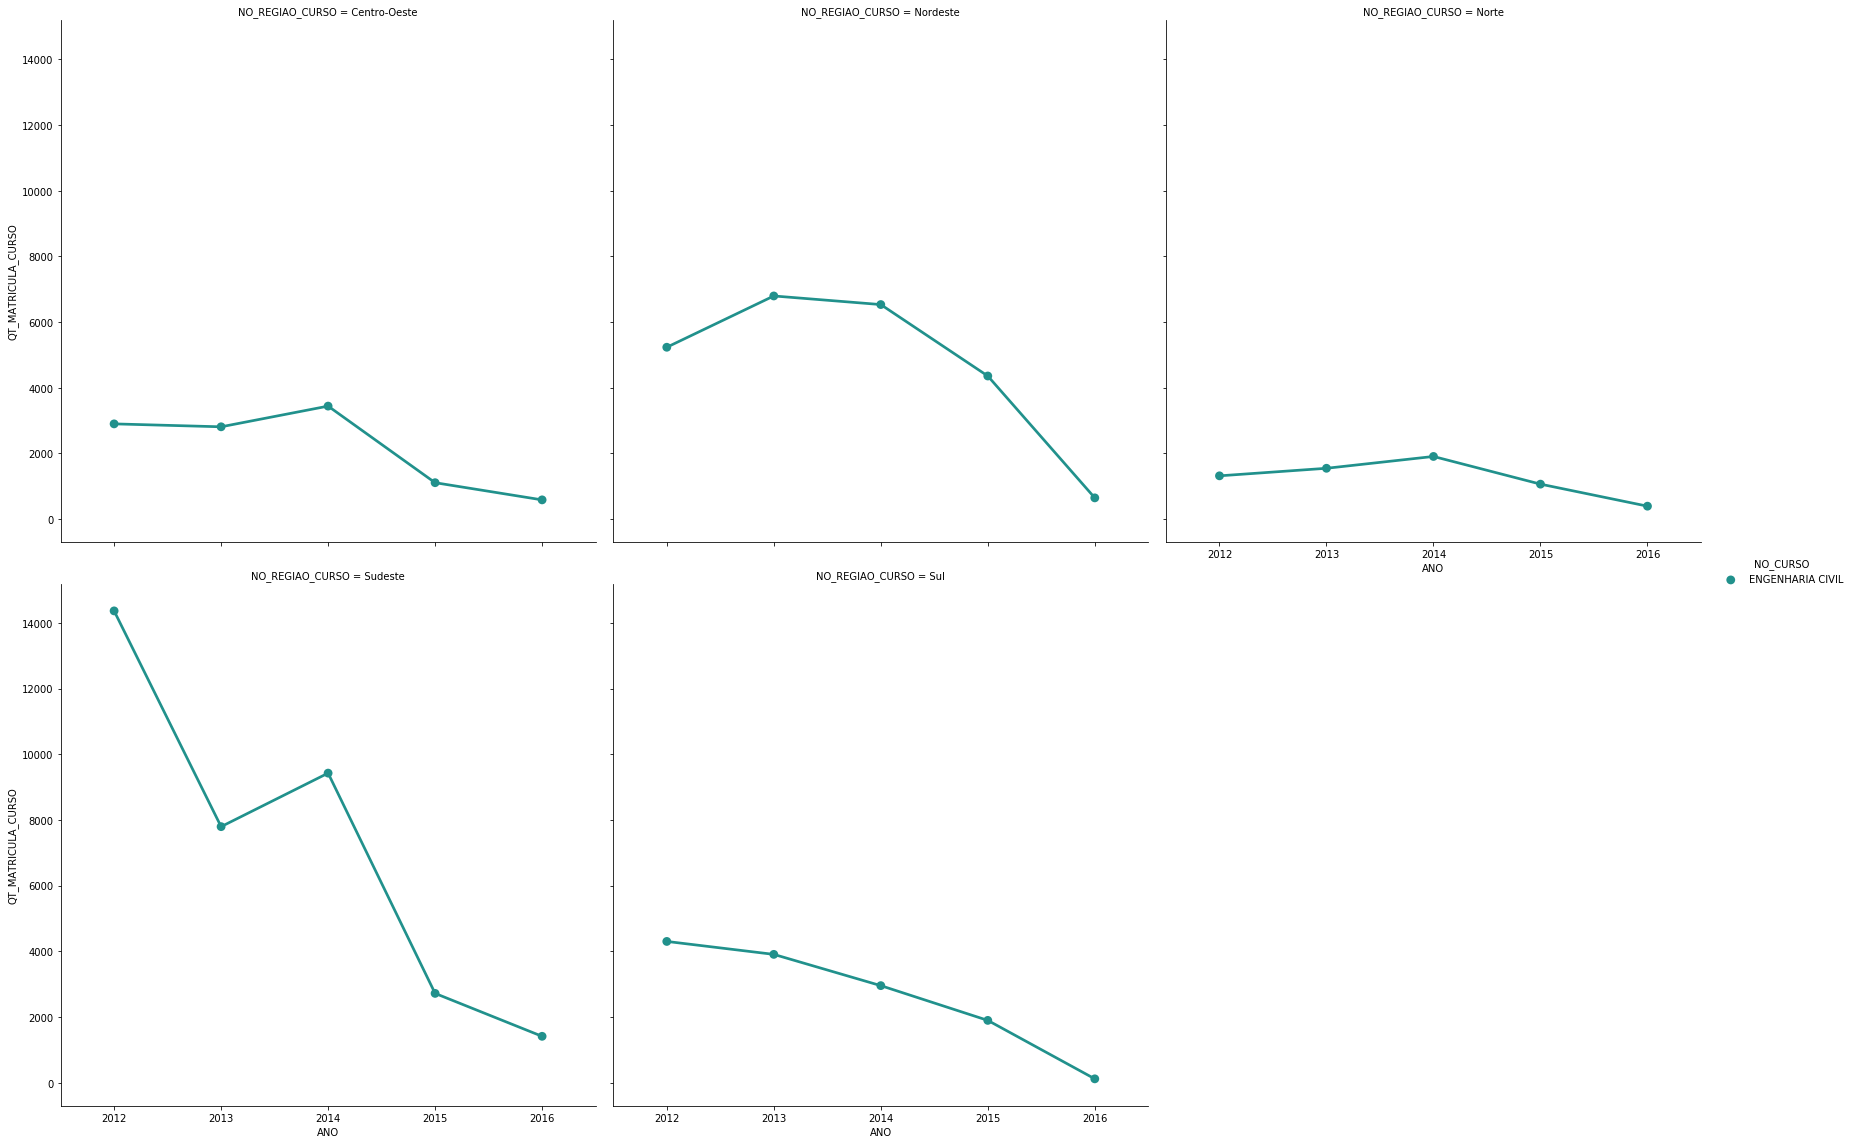

In [192]:
sns.catplot(x="ANO", 
            y="QT_MATRICULA_CURSO", 
            data=df_mais_matriculas_regiao, 
            hue="NO_CURSO",
            col="NO_REGIAO_CURSO",
            kind="point",
            col_wrap=3,
            height=8,
            palette='viridis');

<font color='blue' size=4>
Iremos verificar qual foi o curso com maior quantidade de vagas novas ao longo do tempo por região.

In [193]:
dados = []
for regiao in regioes:
    # Verifica região por região
    condicao = df_curso_regiao_sum['NO_REGIAO_CURSO'] == regiao
    df = df_curso_regiao_sum[condicao].sort_values(by=['MEDIA_QT_VAGAS_NOVAS'], ascending=False).head(1)
    df = df.reset_index()
    dados.append(list(zip(df['NO_REGIAO_CURSO'], df['NO_CURSO'])))
dados

[[('Centro-Oeste', 'ENGENHARIA CIVIL')],
 [('Nordeste', 'ENGENHARIA CIVIL')],
 [('Norte', 'ENGENHARIA CIVIL')],
 [('Sudeste', 'ENGENHARIA CIVIL')],
 [('Sul', 'ENGENHARIA CIVIL')]]

In [194]:
for index in range(len(dados)):
    # Verifica cada elemento da seleção anterior e seleciona os dados do dataframe principal de cursos por região
    regiao = df_curso_regiao['NO_REGIAO_CURSO'] == dados[index][0][0]
    curso = df_curso_regiao['NO_CURSO'] == dados[index][0][1]
    condicao = regiao & curso
    if index == 0:
        df_mais_vagas_regiao = df_curso_regiao[condicao]
    else:
        df_mais_vagas_regiao = df_mais_vagas_regiao.append(df_curso_regiao[condicao])

# Dataframe com os cursos com mais vagas novas por região ao longo do tempo (média entre 2010 e 2016)        
df_mais_vagas_regiao.head(15)

,NO_REGIAO_CURSO,NO_CURSO,ANO,QT_VAGAS_TOTAIS,QT_MATRICULA_CURSO,QT_VAGAS_NOVAS_TOTAIS
99,Centro-Oeste,ENGENHARIA CIVIL,2012,1785,2900.0,1087.0
100,Centro-Oeste,ENGENHARIA CIVIL,2013,1335,2811.0,1080.0
101,Centro-Oeste,ENGENHARIA CIVIL,2014,2794,3441.0,1869.0
102,Centro-Oeste,ENGENHARIA CIVIL,2015,2671,1109.0,1210.0
103,Centro-Oeste,ENGENHARIA CIVIL,2016,1501,586.0,1433.0
439,Nordeste,ENGENHARIA CIVIL,2012,2592,5233.0,1930.0
440,Nordeste,ENGENHARIA CIVIL,2013,4714,6795.0,2805.0
441,Nordeste,ENGENHARIA CIVIL,2014,7508,6533.0,4491.0
442,Nordeste,ENGENHARIA CIVIL,2015,6443,4358.0,4603.0
443,Nordeste,ENGENHARIA CIVIL,2016,3486,647.0,2401.0


<font color='blue' size=4>
Com base nas maiores médias de quantidade de vagas novas entre 2012 e 2016, iremos plotar as informações dos cursos ao longo do tempo por região.

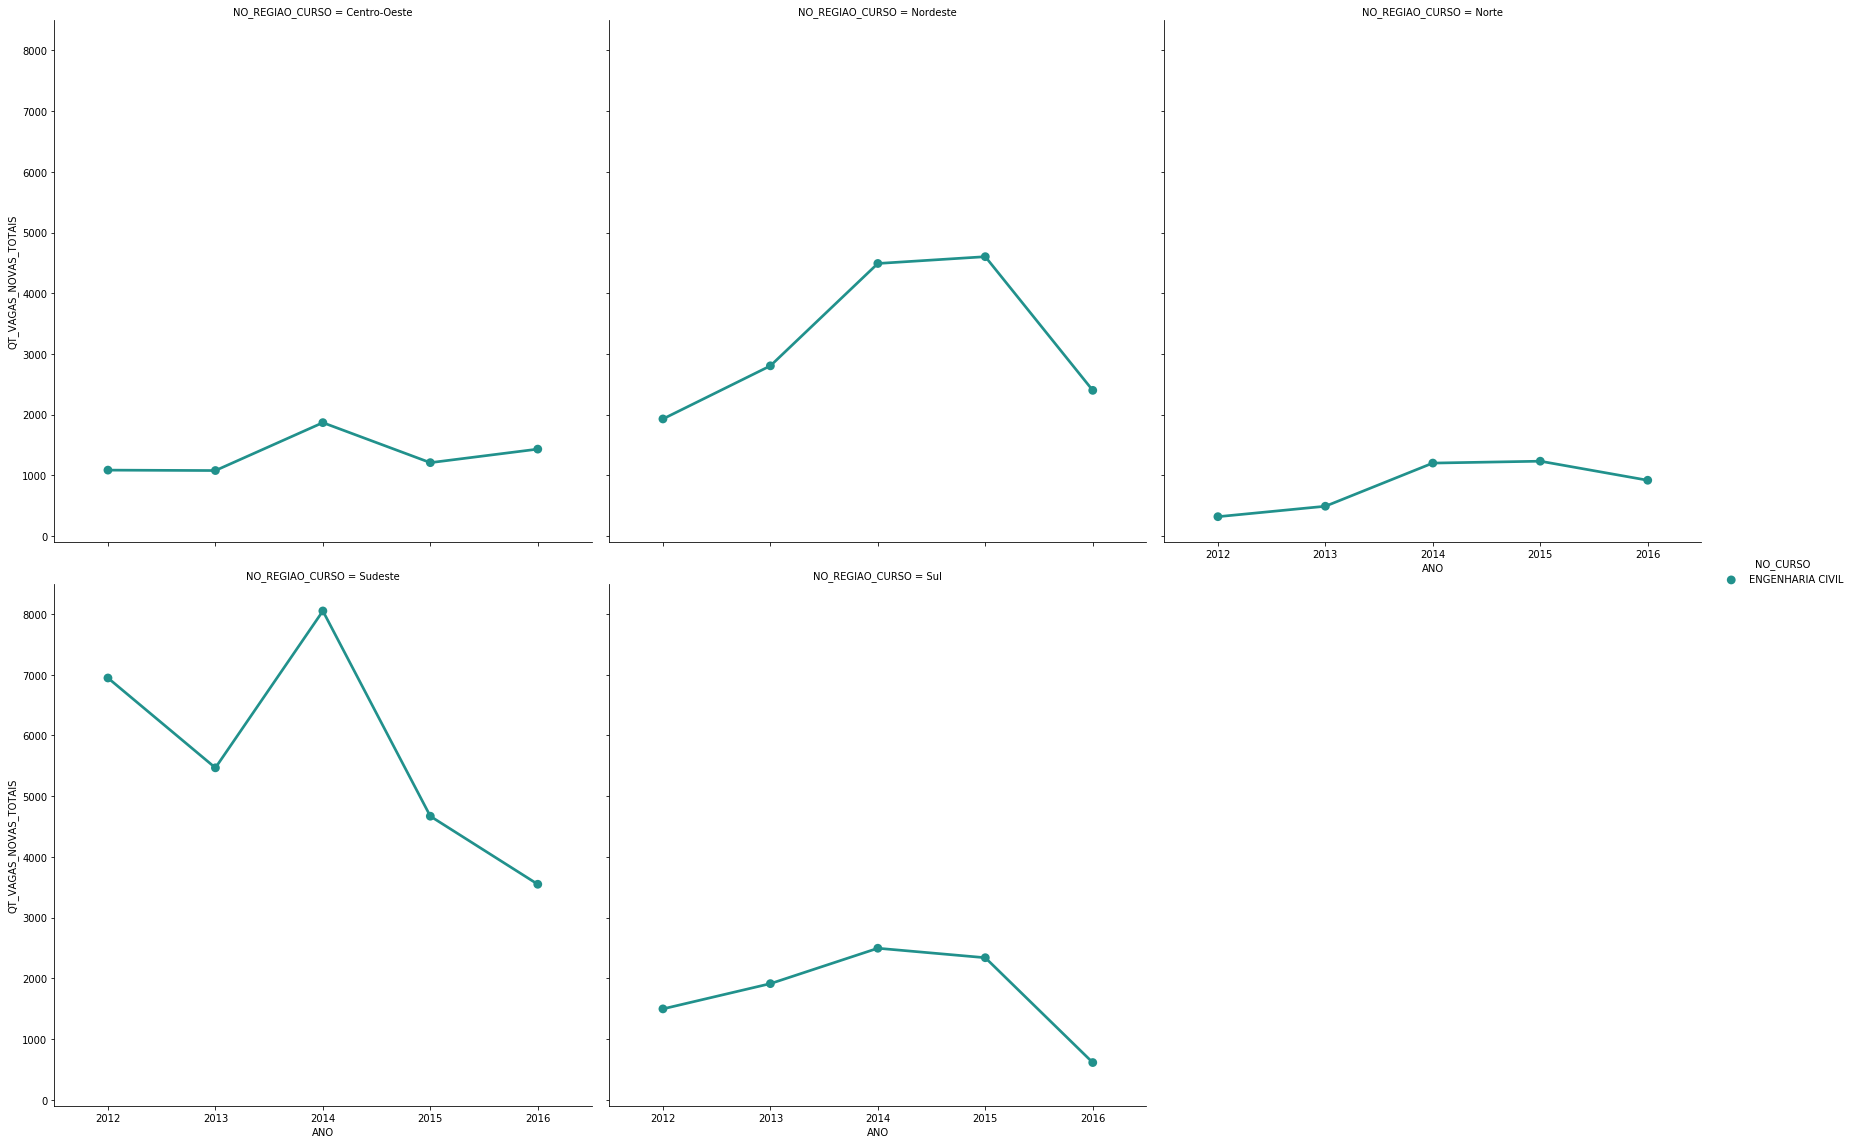

In [195]:
sns.catplot(x="ANO", 
            y="QT_VAGAS_NOVAS_TOTAIS", 
            data=df_mais_vagas_regiao, 
            hue="NO_CURSO",
            col="NO_REGIAO_CURSO",
            kind="point",
            col_wrap=3,
            height=8,
            palette='viridis');

<font color='blue' size=4>
Pelos números observados anteriormente, o curso de Engenharia Civil foi o que teve o maior crescimento de matrículas, em média, ao longo do tempo entre 2012 e 2016. O mesmo também foi observado em relação ao número de novas vagas criadas.

<font color='blue' size=4>
Iremos verificar qual foi o curso com menor quantidade de matrículas ao longo do tempo por região.

In [196]:
dados = []
for regiao in regioes:
    # Verifica região por região
    condicao = df_curso_regiao_sum['NO_REGIAO_CURSO'] == regiao
    df = df_curso_regiao_sum[condicao].sort_values(by=['MEDIA_QT_MATRICULA_CURSO'], ascending=True).head(1)
    df = df.reset_index()
    dados.append(list(zip(df['NO_REGIAO_CURSO'], df['NO_CURSO'])))
dados

[[('Centro-Oeste', 'ENGENHARIA DE TELECOMUNICAÇÕES')],
 [('Nordeste', 'CIÊNCIA POLÍTICA')],
 [('Norte', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS')],
 [('Sudeste', 'LETRAS - LÍNGUA INGLESA')],
 [('Sul', 'ENGENHARIA DE TRANSPORTES')]]

In [197]:
for index in range(len(dados)):
    # Verifica cada elemento da seleção anterior e seleciona os dados do dataframe principal de cursos por região
    regiao = df_curso_regiao['NO_REGIAO_CURSO'] == dados[index][0][0]
    curso = df_curso_regiao['NO_CURSO'] == dados[index][0][1]
    condicao = regiao & curso
    if index == 0:
        df_menos_matriculas_regiao = df_curso_regiao[condicao]
    else:
        df_menos_matriculas_regiao = df_menos_matriculas_regiao.append(df_curso_regiao[condicao])

# Dataframe com os cursos com mais matrículas por região ao longo do tempo (média entre 2010 e 2016)        
df_menos_matriculas_regiao.head(15)

,NO_REGIAO_CURSO,NO_CURSO,ANO,QT_VAGAS_TOTAIS,QT_MATRICULA_CURSO,QT_VAGAS_NOVAS_TOTAIS
121,Centro-Oeste,ENGENHARIA DE TELECOMUNICAÇÕES,2012,20,0.0,20.0
344,Nordeste,CIÊNCIA POLÍTICA,2016,105,3.0,100.0
991,Norte,ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS,2013,50,6.0,50.0
1444,Sudeste,LETRAS - LÍNGUA INGLESA,2016,180,0.0,180.0
1821,Sul,ENGENHARIA DE TRANSPORTES,2015,101,1.0,100.0


In [198]:
len(df_menos_matriculas_regiao.ANO.values)

5

In [199]:
len(df_menos_matriculas_regiao.QT_MATRICULA_CURSO.values)


5

In [200]:
df_menos_matriculas_regiao.shape

(5, 6)

In [201]:
df_menos_matriculas_regiao.NO_CURSO


121          ENGENHARIA DE TELECOMUNICAÇÕES
344                        CIÊNCIA POLÍTICA
991     ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS
1444                LETRAS - LÍNGUA INGLESA
1821              ENGENHARIA DE TRANSPORTES
Name: NO_CURSO, dtype: object

In [202]:
df_menos_matriculas_regiao.replace({'ENGENHARIA DE TELECOMUNICAÇÕES': 'TELECOM',\
                                    'CIÊNCIA POLÍTICA': 'POLITICA',\
                                    'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS': 'JUDICIARIO',\
                                    'LETRAS - LÍNGUA INGLESA': 'INGLES',\
                                    'ENGENHARIA DE TRANSPORTES': 'TRANSPORTES'}, inplace=True) 

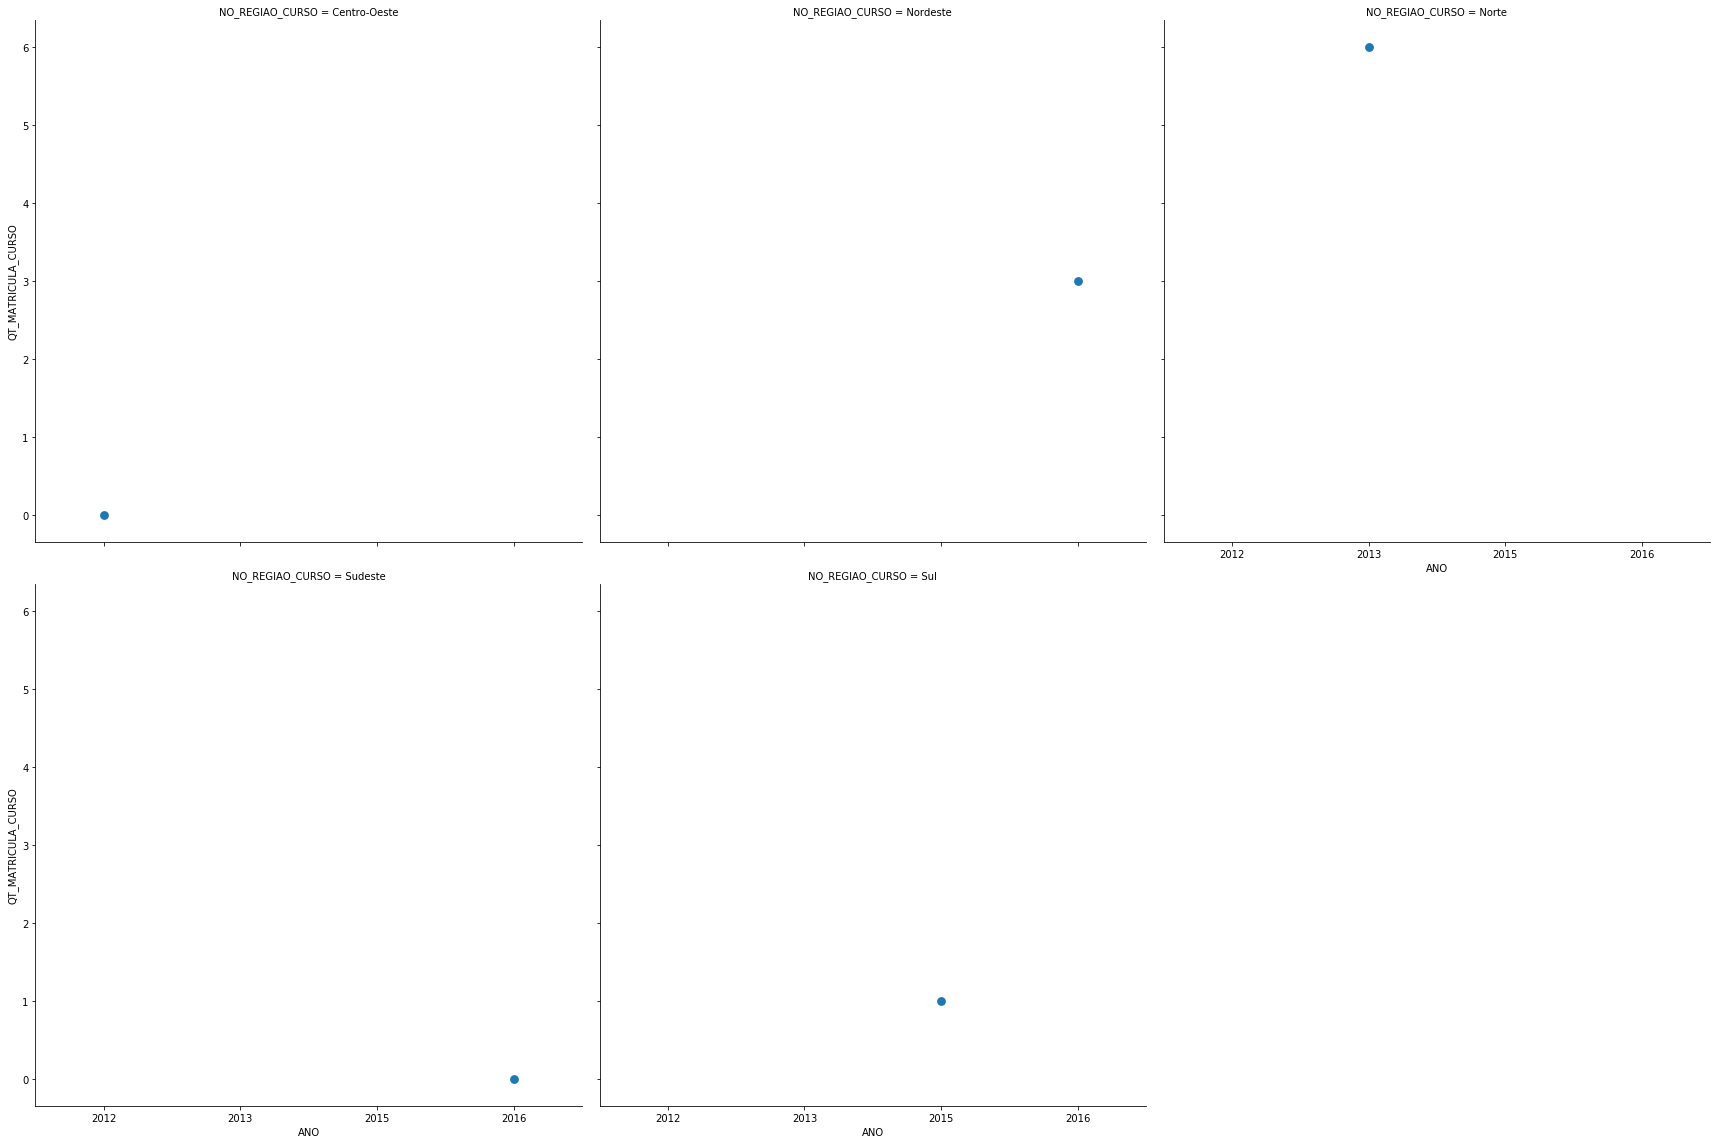

In [203]:
import matplotlib
from matplotlib import _preprocess_data

sns.catplot(x='ANO',
            y="QT_MATRICULA_CURSO",
            data=df_menos_matriculas_regiao,
            #hue='NO_CURSO', bug do catplot
            col="NO_REGIAO_CURSO",
            kind="point",
            col_wrap=3,
            height=8)



<font color='blue' size=4>
Verificamos que estes cursos com um menor número de matrículas, em média ao longo dos anos de 2012 a 2016, possuem períodos longos que não foram registradas nenhuma matrícula.

## 7. Construa uma variável "Signo" dos estudantes e explique porque ela é correlacionada com a variável "probabilidade de formação".

In [204]:
def insert_zero(numero):
    if numero < 10:
        return '0' + str(numero)
    else:
        return str(numero)

df_alunos['DIA_MES'] = df_alunos['NU_DIA_ALUNO_NASC'].apply(insert_zero) + \
                       df_alunos['NU_MES_ALUNO_NASC'].apply(insert_zero)


def zodiac_sign_number(data):

    day, month = int(data[0:2]), int(data[2:])
    astro_sign = 0

    if month == 12:
        astro_sign = 9 if (day < 22) else 10 # Capricornio = 10

    elif month == 1:
        astro_sign = 10 if (day < 20) else 11 # Aquario = 11

    elif month == 2:
        astro_sign = 11 if (day < 19) else 12 # Peixes = 12

    elif month == 3:
        astro_sign = 12 if (day < 21) else 1 # Aries = 1

    elif month == 4:
        astro_sign = 1 if (day < 20) else 2 # Touro = 2

    elif month == 5:
        astro_sign = 2 if (day < 21) else 3 # Gemeos = 3

    elif month == 6:
        astro_sign = 3 if (day < 21) else 4 # Cancer = 4

    elif month == 7:
        astro_sign = 4 if (day < 23) else 5 # Leao = 5

    elif month == 8:
        astro_sign = 5 if (day < 23) else 6 # Virgem = 6

    elif month == 9:
        astro_sign = 6 if (day < 23) else 7 # Libra = 7

    elif month == 10:
        astro_sign = 7 if (day < 23) else 8 # Escorpiao = 8

    elif month == 11:
        astro_sign = 8 if (day < 22) else 9 # Sagitario = 9

    return astro_sign

df_alunos['SIGNO'] = df_alunos['DIA_MES'].apply(zodiac_sign_number)

In [205]:
df_alunos.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_CURSO,NO_CURSO,CO_CURSO_POLO,CO_TURNO_ALUNO,...,CO_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,ANO_INGRESSO,DIA_MES,SIGNO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,NaN,NaN,NaN,1,0,0,0,2014,1807,4
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,1.0,...,NaN,NaN,NaN,1,0,0,0,2015,2403,1
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,NaN,NaN,NaN,1,0,0,0,2013,0907,4
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,1.0,...,NaN,NaN,NaN,1,0,0,0,2014,2307,5
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,NaN,NaN,NaN,1,0,0,0,2015,2212,10


In [206]:
df_signo = df_alunos.groupby('ANO_INGRESSO').agg({'IN_CONCLUINTE':'sum',
                                                   'IN_MATRICULA':'sum',
                                                   'SIGNO':'median'})
df_signo.head()

,IN_CONCLUINTE,IN_MATRICULA,SIGNO
ANO_INGRESSO,,,
1979,0,0,6.0
1986,1,1,11.0
1989,0,0,5.0
1992,0,1,3.0
1994,0,1,7.0


In [207]:
df_signo['probabilidade_conclusão'] = df_signo['IN_CONCLUINTE'] / df_signo['IN_MATRICULA'] + 4
df_signo.head()

,IN_CONCLUINTE,IN_MATRICULA,SIGNO,probabilidade_conclusão
ANO_INGRESSO,,,,
1979,0,0,6.0,NaN
1986,1,1,11.0,5.0
1989,0,0,5.0,NaN
1992,0,1,3.0,4.0
1994,0,1,7.0,4.0


In [208]:
df_signo.fillna(0,inplace=True)
df_signo.head()

,IN_CONCLUINTE,IN_MATRICULA,SIGNO,probabilidade_conclusão
ANO_INGRESSO,,,,
1979,0,0,6.0,0.0
1986,1,1,11.0,5.0
1989,0,0,5.0,0.0
1992,0,1,3.0,4.0
1994,0,1,7.0,4.0


In [209]:
df_signo_intervalo = df_signo.loc['1995':'2012']
df_signo_intervalo.head()

,IN_CONCLUINTE,IN_MATRICULA,SIGNO,probabilidade_conclusão
ANO_INGRESSO,,,,
1995,0,1,12.0,4.00
1996,0,1,5.0,4.00
1997,1,4,2.0,4.25
1998,0,0,5.0,0.00
1999,0,4,8.0,4.00


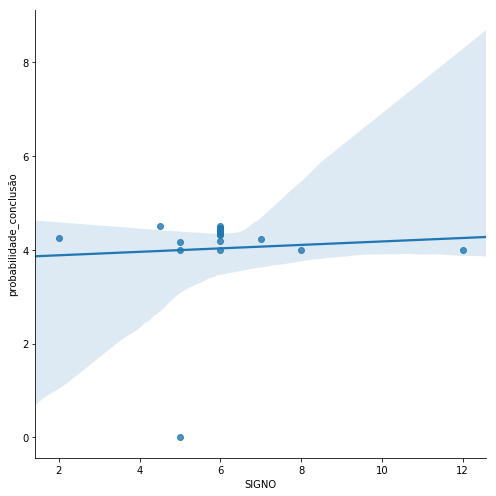

In [210]:
sns.lmplot(x="SIGNO",y="probabilidade_conclusão",data=df_signo_intervalo,size = 7);

In [211]:
df_signo_intervalo.corr()

,IN_CONCLUINTE,IN_MATRICULA,SIGNO,probabilidade_conclusão
IN_CONCLUINTE,1.000000,0.998132,-0.006706,0.182323
IN_MATRICULA,0.998132,1.000000,-0.006428,0.179683
SIGNO,-0.006706,-0.006428,1.000000,0.068968
probabilidade_conclusão,0.182323,0.179683,0.068968,1.000000


In [212]:
data= df_signo_intervalo[['SIGNO','probabilidade_conclusão']]
correlation = data.corr(method='pearson')
correlation

,SIGNO,probabilidade_conclusão
SIGNO,1.000000,0.068968
probabilidade_conclusão,0.068968,1.000000


<font color='blue' size=4>
Existe uma fraca correlação entre o signo dos alunos e a sua probabilidade de conclusão

# PARTE FACULTATIVA

## 1. Crie um mapa das universidades no país.

In [213]:
#!pip3 install folium --user

In [255]:
import folium
from folium import plugins

In [256]:
# Coordenadas extraídas do Google Maps
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=5)

In [257]:
df_municipios = pd.read_csv('./data/municipios.csv')
df_municipios.columns = ['COD_IBGE', 'NOME', 'COD_UF', 'UF', 'ESTADO', 'LATITUDE', 'LONGITUDE']
del df_municipios['COD_IBGE']
del df_municipios['COD_UF']
del df_municipios['ESTADO']
df_municipios.head()

,NOME,UF,LATITUDE,LONGITUDE
0,Abadia de Goiás,GO,-16.75730,-49.4412
1,Abadia dos Dourados,MG,-18.48310,-47.3916
2,Abadiânia,GO,-16.19700,-48.7057
3,Abaeté,MG,-19.15510,-45.4444
4,Abaetetuba,PA,-1.72183,-48.8788


In [258]:
# Retorna as coordenadas dos municípios a partir do nome e da UF
def get_latitude(municipio_uf):
    municipio, UF = municipio_uf.split('|')
    condicao1 = df_municipios['NOME'] == municipio
    condicao2 = df_municipios['UF'] == UF
    condicao = condicao1 & condicao2
    return df_municipios[condicao]['LATITUDE'].to_string(index=False)

def get_longitude(municipio_uf):
    municipio, UF = municipio_uf.split('|')
    condicao1 = df_municipios['NOME'] == municipio
    condicao2 = df_municipios['UF'] == UF
    condicao = condicao1 & condicao2
    return df_municipios[condicao]['LONGITUDE'].to_string(index=False)

In [259]:
# Gerando uma nova coluna para recuperar as coordenadas
df_IES['MUNICIPIO_UF'] = df_IES['NO_MUNICIPIO_IES'] + '|' + df_IES['SGL_UF_IES']

In [260]:
df_IES['LATITUDE'] = df_IES['MUNICIPIO_UF'].apply(get_latitude)
df_IES['LONGITUDE'] = df_IES['MUNICIPIO_UF'].apply(get_longitude)


In [261]:
df_IES[1934:1938]

,CO_IES,NO_IES,SGL_IES,CO_MANTENEDORA,NO_MANTENEDORA,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_MUNICIPIO_IES,...,VL_DES_PESSOAL_REM_DOCENTE,VL_DES_PESSOAL_REM_TECNICO,VL_DES_PESSOAL_ENCARGO,VL_DES_CUSTEIO,VL_DES_INVESTIMENTO,VL_DES_PESQUISA,VL_DES_OUTRAS,LATITUDE,LONGITUDE,MUNICIPIO_UF
1934,4773,FACULDADE IBS,IBS,3058,IBS BUSINESS SCHOOL DE MINAS GERAIS LTDA,4,Privada com fins lucrativos,3,Faculdade,3106200,...,881810.02,361132.28,481716.97,120374.98,0.00,0.00,59980.43,-19.9102,-43.9266,Belo Horizonte|MG
1935,4784,FACULDADE CDL,NaN,3064,CAMARA DE DIRIGENTES LOJISTAS DE FORTALEZA,5,Privada sem fins lucrativos,3,Faculdade,2304400,...,1158730.67,958952.64,737591.40,22110.59,0.00,0.00,2083590.32,-3.71664,-38.5423,Fortaleza|CE
1936,4810,FACULDADE ANTÔNIO MENEGHETTI,AMF,3073,FOIL LTDA - EPP,4,Privada com fins lucrativos,3,Faculdade,4315503,...,1321732.24,881154.82,1583252.65,3101100.58,748467.42,260859.12,0.00,"Series([], )","Series([], )",Restinga Seca|RS
1937,3448,INSTITUTO SUPERIOR DE EDUCAÇÃO IBITURUNA,ISEIB,3074,FACULDADES VERDE NORTE - FAVENORTE - EIRELI,4,Privada com fins lucrativos,3,Faculdade,3143302,...,224239.68,168179.76,196209.72,213027.69,224239.68,33635.95,44847.94,-16.7282,-43.8578,Montes Claros|MG


In [262]:
if 'Restinga Seca' not in df_municipios.values:
    print('Element does not exist in Dataframe')

Element does not exist in Dataframe


In [263]:
# Restinga Seca Latitude e Longitude: 29.8210° S, 53.3741° W

In [264]:
df_IES['LATITUDE'][1936] = -29.8210
df_IES['LONGITUDE'][1936] = -53.3741

In [265]:
df_IES[1934:1938]

,CO_IES,NO_IES,SGL_IES,CO_MANTENEDORA,NO_MANTENEDORA,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_MUNICIPIO_IES,...,VL_DES_PESSOAL_REM_DOCENTE,VL_DES_PESSOAL_REM_TECNICO,VL_DES_PESSOAL_ENCARGO,VL_DES_CUSTEIO,VL_DES_INVESTIMENTO,VL_DES_PESQUISA,VL_DES_OUTRAS,LATITUDE,LONGITUDE,MUNICIPIO_UF
1934,4773,FACULDADE IBS,IBS,3058,IBS BUSINESS SCHOOL DE MINAS GERAIS LTDA,4,Privada com fins lucrativos,3,Faculdade,3106200,...,881810.02,361132.28,481716.97,120374.98,0.00,0.00,59980.43,-19.9102,-43.9266,Belo Horizonte|MG
1935,4784,FACULDADE CDL,NaN,3064,CAMARA DE DIRIGENTES LOJISTAS DE FORTALEZA,5,Privada sem fins lucrativos,3,Faculdade,2304400,...,1158730.67,958952.64,737591.40,22110.59,0.00,0.00,2083590.32,-3.71664,-38.5423,Fortaleza|CE
1936,4810,FACULDADE ANTÔNIO MENEGHETTI,AMF,3073,FOIL LTDA - EPP,4,Privada com fins lucrativos,3,Faculdade,4315503,...,1321732.24,881154.82,1583252.65,3101100.58,748467.42,260859.12,0.00,-29.821,-53.3741,Restinga Seca|RS
1937,3448,INSTITUTO SUPERIOR DE EDUCAÇÃO IBITURUNA,ISEIB,3074,FACULDADES VERDE NORTE - FAVENORTE - EIRELI,4,Privada com fins lucrativos,3,Faculdade,3143302,...,224239.68,168179.76,196209.72,213027.69,224239.68,33635.95,44847.94,-16.7282,-43.8578,Montes Claros|MG


In [266]:
# Convertendo as colunas para o tipo float
df_IES['LATITUDE'] = pd.to_numeric(df_IES['LATITUDE'])
df_IES['LONGITUDE'] = pd.to_numeric(df_IES['LONGITUDE'])

del df_IES['MUNICIPIO_UF']
df_IES.head()

,CO_IES,NO_IES,SGL_IES,CO_MANTENEDORA,NO_MANTENEDORA,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_MUNICIPIO_IES,...,VL_OUTRA_RECEITA,VL_DES_PESSOAL_REM_DOCENTE,VL_DES_PESSOAL_REM_TECNICO,VL_DES_PESSOAL_ENCARGO,VL_DES_CUSTEIO,VL_DES_INVESTIMENTO,VL_DES_PESQUISA,VL_DES_OUTRAS,LATITUDE,LONGITUDE
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,FUNDACAO UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,5103403,...,0.000000e+00,2.409985e+08,1.047201e+08,1.016396e+08,1.301580e+08,17926971.06,14034108.54,2.446976e+08,-15.60100,-56.0974
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,2,FUNDACAO UNIVERSIDADE DE BRASILIA,1,Pública Federal,1,Universidade,5300108,...,1.270250e+08,9.406867e+08,0.000000e+00,9.406867e+08,3.031958e+08,29754378.97,12466559.85,3.734387e+08,-15.77950,-47.9297
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,3,FUNDACAO UNIVERSIDADE FEDERAL DE SERGIPE,1,Pública Federal,1,Universidade,2806701,...,2.693960e+08,2.817225e+08,1.516967e+08,1.128631e+08,1.558269e+08,53033112.85,25766649.67,0.000000e+00,-11.00840,-37.2044
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,4,FUNDACAO UNIVERSIDADE DO AMAZONAS,1,Pública Federal,1,Universidade,1302603,...,7.760058e+05,3.123510e+08,0.000000e+00,9.795765e+07,1.474634e+08,31936025.81,1055524.04,1.368965e+08,-3.11866,-60.0212
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,6,UNIVERSIDADE FEDERAL DE OURO PRETO,1,Pública Federal,1,Universidade,3146107,...,3.957849e+06,1.543418e+08,7.137004e+07,3.582467e+07,4.110826e+07,1676309.58,1142377.41,1.032126e+08,-20.37960,-43.5120


In [267]:
# Verificando se há algum município sem coordenadas definidas e selecionando apenas as que estão OK
df_IES[df_IES['LATITUDE'].isnull()]['NO_MUNICIPIO_IES']

Series([], Name: NO_MUNICIPIO_IES, dtype: object)

In [268]:
df_IES = df_IES[df_IES['LATITUDE'].notnull()]

In [2]:
coordenadas = []

lat = df_IES.iloc[:]['LATITUDE'].values
long = df_IES.iloc[:]['LONGITUDE'].values

for la,lo in zip(lat, long):
    coordenadas.append([la,lo])
 
brasil.add_child(plugins.HeatMap(coordenadas))

capitais = ['Rio Branco', 'Macapá', 'Manaus', 'Belém', 'Porto Velho',
            'Boa Vista', 'Palmas', 'Maceió', 'Salvador', 'Fortaleza',
            'São Luís', 'João Pessoa', 'Recife', 'Teresina', 'Natal',
            'Aracaju', 'Goiânia', 'Cuiabá', 'Campo Grande', 'Brasília',
            'Vitória', 'Belo Horizonte', 'São Paulo', 'Rio de Janeiro',
            'Curitiba', 'Porto Alegre', 'Florianópolis', 'Brasília']

for _, IES in df_IES.iterrows():
    if IES['NO_MUNICIPIO_IES'] in capitais:
        folium.Marker(
            location=[IES['LATITUDE'], IES['LONGITUDE']], popup=IES['NO_MUNICIPIO_IES']).add_to(brasil)
brasil

NameError: name 'df_IES' is not defined

## 2. Alunos estrangeiros são melhores resilientes (para terminar um curso) que os brasileiros? Quais as dificuldades dessa análise?

In [232]:
df_alunos_bra_estra_situacao = df_alunos_maior_1990[['CO_NACIONALIDADE_ALUNO', 
                                                     'DS_ALUNO_SITUACAO']]

dummy = pd.get_dummies(df_alunos_bra_estra_situacao['DS_ALUNO_SITUACAO'])
df_alunos_bra_estra_situacao = pd.concat([df_alunos_bra_estra_situacao, dummy], axis=1)

df_alunos_bra_estra_situacao['TOTAL_ALUNOS'] = 1

df_alunos_bra_estra_situacao = df_alunos_bra_estra_situacao.groupby(['CO_NACIONALIDADE_ALUNO']).sum()
df_alunos_bra_estra_situacao = df_alunos_bra_estra_situacao.reset_index()
df_alunos_bra_estra_situacao.head()

,CO_NACIONALIDADE_ALUNO,Cursando,Desvinculado do curso,Falecido,Formado,Matrícula trancada,Transferido para outro curso da mesma IES,TOTAL_ALUNOS
0,1,68568.0,20349.0,20.0,11674.0,12466.0,1041.0,114118
1,2,101.0,18.0,0.0,12.0,12.0,0.0,143
2,3,135.0,27.0,0.0,40.0,24.0,1.0,227


In [233]:
# Calculando a taxa de conclusão como sendo o total de alunos formados por curso em um determinado ano dividido
# somatório de todas as situações desse mesmo ano e multiplicado por 100 (expressar valores em %)

df_alunos_bra_estra_situacao['TAXA_CONCLUSAO'] = (df_alunos_bra_estra_situacao['Formado']/
                                                 df_alunos_bra_estra_situacao['TOTAL_ALUNOS'])*100

In [234]:
# O mesmo procedimento para a taxa de abandono
df_alunos_bra_estra_situacao['TAXA_ABANDONO'] = ((df_alunos_bra_estra_situacao['Matrícula trancada'] + 
                                                 df_alunos_bra_estra_situacao['Desvinculado do curso']) / 
                                                 df_alunos_bra_estra_situacao['TOTAL_ALUNOS'])*100

df_alunos_bra_estra_situacao.head()

,CO_NACIONALIDADE_ALUNO,Cursando,Desvinculado do curso,Falecido,Formado,Matrícula trancada,Transferido para outro curso da mesma IES,TOTAL_ALUNOS,TAXA_CONCLUSAO,TAXA_ABANDONO
0,1,68568.0,20349.0,20.0,11674.0,12466.0,1041.0,114118,10.229762,28.755323
1,2,101.0,18.0,0.0,12.0,12.0,0.0,143,8.391608,20.979021
2,3,135.0,27.0,0.0,40.0,24.0,1.0,227,17.621145,22.466960


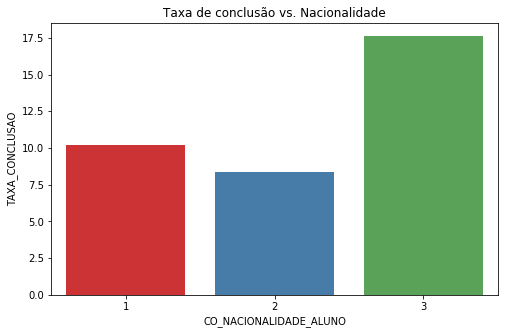

In [235]:
plt.figure(figsize=(8,5))
plt.title("Taxa de conclusão vs. Nacionalidade")
sns.barplot(x="CO_NACIONALIDADE_ALUNO", 
            y="TAXA_CONCLUSAO", 
            data=df_alunos_bra_estra_situacao, 
            palette='Set1');

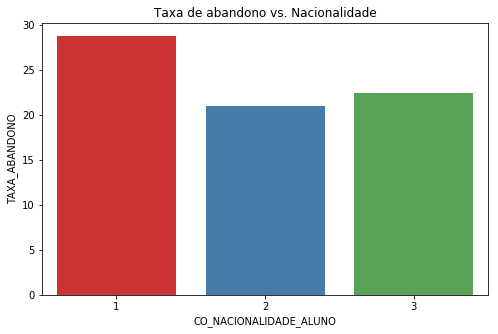

In [236]:
plt.figure(figsize=(8,5))
plt.title("Taxa de abandono vs. Nacionalidade")
sns.barplot(x="CO_NACIONALIDADE_ALUNO", 
            y="TAXA_ABANDONO", 
            data=df_alunos_bra_estra_situacao, 
            palette='Set1');

<font color='blue' size=4>
Considerando apenas os números mostrados os estrangeiros seriam mais resilientes que os brasileiros, porém temos uma grande quantidade de alunos brasileiros comparada à quantidade de alunos estrangeiros e a variação entre as taxas de conclusão e abandono é pequena.

## 3. Se você tivesse que abrir um curso (apenas um curso de graduação), qual seria, onde ele seria, qual a modalidade?

In [237]:
# Recriando o dataframe com apenas os cursos em atividade
df_curso_regiao = df_curso[df_curso['CO_SITUACAO_CURSO'] == 1]

In [238]:
# Verificando as modalidades de cursos oferecidos
df_curso_regiao['CO_MODALIDADE_ENSINO'].unique()

array([1, 2])

### Atualmente não existem cursos oferecidos à distância.

In [239]:
# Verificando a relação entre matrículas (procura) e vagas (oferta) dos cursos do dataset entre 2012 e 2016
df_curso_regiao_sum['TAXA_OFERTA_PROCURA'] = (df_curso_regiao_sum['MEDIA_QT_MATRICULA_CURSO'] /
                                              df_curso_regiao_sum['MEDIA_QT_VAGAS_NOVAS'])

# Caso a divisão seja por zero (sem vagas novas), não iremos considerar na análise
df_curso_regiao_sum['TAXA_OFERTA_PROCURA'].replace(np.inf, 0, inplace=True)

In [240]:
df_maior_taxa = df_curso_regiao_sum.sort_values(by=['TAXA_OFERTA_PROCURA'], ascending=False).head(5)

### Visualizando os 5 cursos com maior relação entre procura e oferta, ou seja, entre matrículas efetuadas e vagas novas entre 2012 e 2016.

In [241]:
df_maior_taxa

,NO_REGIAO_CURSO,NO_CURSO,QT_VAGAS_TOTAIS,QT_VAGAS_NOVAS_TOTAIS,QT_MATRICULA_CURSO,MEDIA_QT_VAGAS_NOVAS,MEDIA_QT_MATRICULA_CURSO,TAXA_OFERTA_PROCURA
449,Norte,SAÚDE COLETIVA,34,34.0,525.0,6,105,17.500000
422,Norte,LETRAS - LÍNGUA PORTUGUESA,159,134.0,1092.0,26,218,8.384615
182,Nordeste,EDUCAÇÃO DO CAMPO - CIÊNCIAS DA NATUREZA,240,60.0,468.0,12,93,7.750000
275,Nordeste,LETRAS - PORTUGUÊS E ESPANHOL,71,50.0,271.0,10,54,5.400000
743,Sul,DANÇA,41,24.0,109.0,4,21,5.250000


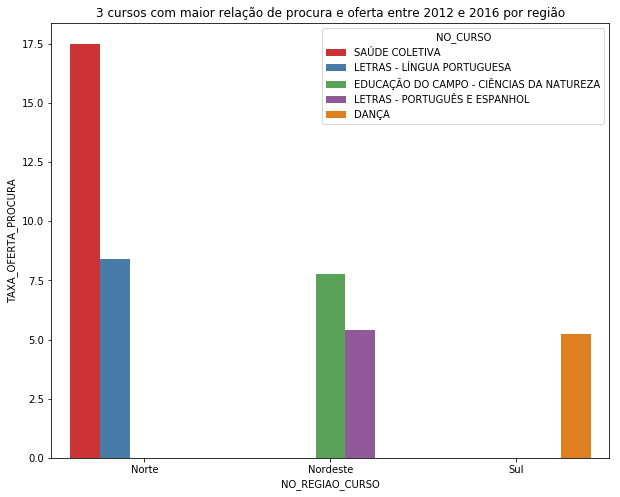

In [242]:
plt.figure(figsize=(10,8))
plt.title("3 cursos com maior relação de procura e oferta entre 2012 e 2016 por região")
sns.barplot(x="NO_REGIAO_CURSO", 
            y="TAXA_OFERTA_PROCURA", 
            data=df_maior_taxa, 
            hue="NO_CURSO", 
            palette='Set1');

<font color='blue' size=4>
Seria vantajoso oferecer o curso de Saúde Coletiva na região Norte na modalidade EAD.